# **Phishing Websites Detection by Machine Learning Techniques**

## **Objective**

The primary objective of a phishing website detection project is to identify and flag potentially malicious websites that attempt to steal user
information or data. A phishing website is a common social engineering method that mimics trustful uniform resource locators (URLs) and webpages.This is achieved by analyzing website features, such as URL structure, content, and visual elements, to determine if a website is a phishing attempt. The goal is to protect users from falling victim to phishing attacks, which can result in financial losses, data breaches, and reputational damage. The main objective of this project is to train machine learning models on the dataset to predict phishing websites.

**Week 1**

# **Understanding the Problem and Dataset**

In [1]:
#importing basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import pickle
import shap
shap.initjs()
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import files


uploaded = files.upload()


Saving dataset_phishing.csv to dataset_phishing.csv


In [3]:
#Loading the data
df = pd.read_csv('dataset_phishing.csv')
df.head()

url  length_url  \
0              http://www.crestonwood.com/router.php          37   
1  http://shadetreetechnology.com/V4/validation/a...          77   
2  https://support-appleld.com.secureupdate.duila...         126   
3                                 http://rgipt.ac.in          18   
4  http://www.iracing.com/tracks/gateway-motorspo...          55   

   length_hostname  ip  nb_dots  nb_hyphens  nb_at  nb_qm  nb_and  nb_or  ...  \
0               19   0        3           0      0      0       0      0  ...   
1               23   1        1           0      0      0       0      0  ...   
2               50   1        4           1      0      1       2      0  ...   
3               11   0        2           0      0      0       0      0  ...   
4               15   0        2           2      0      0       0      0  ...   

   domain_in_title  domain_with_copyright  whois_registered_domain  \
0                0                      1                        0   
1                1                      0                        0   
2                1                      0                        0   
3                1                      0                        0   
4                0                      1                        0   

   domain_registration_length  domain_age  web_traffic  dns_record  \
0                          45          -1            0           1   
1                          77        5767            0           0   
2                          14        4004      5828815           0   
3                          62          -1       107721           0   
4                         224        8175         8725           0   

   google_index  page_rank      status  
0             1          4  legitimate  
1             1          2    phishing  
2             1          0    phishing  
3             0          3  legitimate  
4             0          6  legitimate  

[5 rows x 89 columns]

In [ ]:
# Checking the shape
df.shape

(11430, 89)

In [ ]:
# Checking the datatypes and null/non-null distribution
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [ ]:
# Checking the distribution of numerical values in the dataset
df.describe()

length_url  length_hostname            ip       nb_dots  \
count  11430.000000     11430.000000  11430.000000  11430.000000   
mean      61.126684        21.090289      0.150569      2.480752   
std       55.297318        10.777171      0.357644      1.369686   
min       12.000000         4.000000      0.000000      1.000000   
25%       33.000000        15.000000      0.000000      2.000000   
50%       47.000000        19.000000      0.000000      2.000000   
75%       71.000000        24.000000      0.000000      3.000000   
max     1641.000000       214.000000      1.000000     24.000000   

         nb_hyphens         nb_at         nb_qm        nb_and    nb_or  \
count  11430.000000  11430.000000  11430.000000  11430.000000  11430.0   
mean       0.997550      0.022222      0.141207      0.162292      0.0   
std        2.087087      0.155500      0.364456      0.821337      0.0   
min        0.000000      0.000000      0.000000      0.000000      0.0   
25%        0.000000      0.000000      0.000000      0.000000      0.0   
50%        0.000000      0.000000      0.000000      0.000000      0.0   
75%        1.000000      0.000000      0.000000      0.000000      0.0   
max       43.000000      4.000000      3.000000     19.000000      0.0   

              nb_eq  ...   empty_title  domain_in_title  \
count  11430.000000  ...  11430.000000     11430.000000   
mean       0.293176  ...      0.124759         0.775853   
std        0.998317  ...      0.330460         0.417038   
min        0.000000  ...      0.000000         0.000000   
25%        0.000000  ...      0.000000         1.000000   
50%        0.000000  ...      0.000000         1.000000   
75%        0.000000  ...      0.000000         1.000000   
max       19.000000  ...      1.000000         1.000000   

       domain_with_copyright  whois_registered_domain  \
count           11430.000000             11430.000000   
mean                0.439545                 0.072878   
std                 0.496353                 0.259948   
min                 0.000000                 0.000000   
25%                 0.000000                 0.000000   
50%                 0.000000                 0.000000   
75%                 1.000000                 0.000000   
max                 1.000000                 1.000000   

       domain_registration_length    domain_age   web_traffic    dns_record  \
count                11430.000000  11430.000000  1.143000e+04  11430.000000   
mean                   492.532196   4062.543745  8.567566e+05      0.020122   
std                    814.769415   3107.784600  1.995606e+06      0.140425   
min                     -1.000000    -12.000000  0.000000e+00      0.000000   
25%                     84.000000    972.250000  0.000000e+00      0.000000   
50%                    242.000000   3993.000000  1.651000e+03      0.000000   
75%                    449.000000   7026.750000  3.738455e+05      0.000000   
max                  29829.000000  12874.000000  1.076799e+07      1.000000   

       google_index     page_rank  
count  11430.000000  11430.000000  
mean       0.533946      3.185739  
std        0.498868      2.536955  
min        0.000000      0.000000  
25%        0.000000      1.000000  
50%        1.000000      3.000000  
75%        1.000000      5.000000  
max        1.000000     10.000000  

[8 rows x 87 columns]

In [ ]:
#checking the data for null or missing values
df.isnull().sum()

url                0
length_url         0
length_hostname    0
ip                 0
nb_dots            0
                  ..
web_traffic        0
dns_record         0
google_index       0
page_rank          0
status             0
Length: 89, dtype: int64

In [ ]:
#Listing the features of the dataset
df.columns

Index(['url', 'length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens',
       'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore',
       'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 

In [ ]:
df.dtypes

url                object
length_url          int64
length_hostname     int64
ip                  int64
nb_dots             int64
                    ...  
web_traffic         int64
dns_record          int64
google_index        int64
page_rank           int64
status             object
Length: 89, dtype: object

# **Data Visualization**

In [ ]:
# Finds the count of phishing and legitimate websites
phishing_websites = df.loc[df['status'] == 'phishing'] # find all rows that are fraudulent
legitimate_websites = df.loc[df['status'] == 'legitimate'] # final all rows that aren't fraudulent
print('Phishing websites count: ', len(phishing_websites), ' or comprises', round(df['status'].value_counts()[0]/len(df)*100, 2), '% of the dataset')
print('Legitimate websites count: ', len(legitimate_websites), ' or comprises', round(df['status'].value_counts()[1]/len(df)*100, 2), '% of the dataset')

Phishing websites count:  5715  or comprises 50.0 % of the dataset
Legitimate websites count:  5715  or comprises 50.0 % of the dataset


<Axes: ylabel='count'>

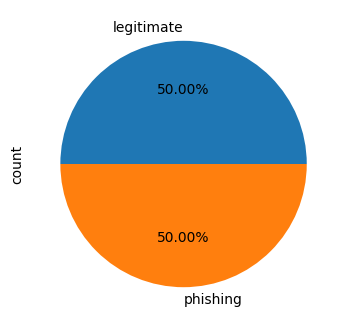

In [ ]:
fig = plt.figure(figsize=(4,4))
df['status'].value_counts().plot.pie(autopct='%0.2f%%')

Text(0.5, 1.0, 'Status Distributions \n (Phishing || Legitimate)')

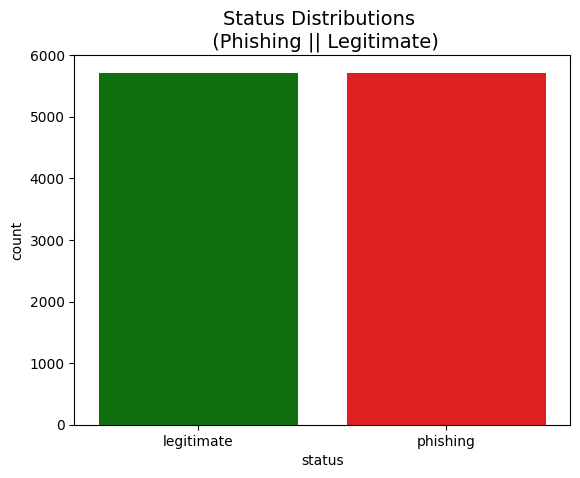

In [ ]:
colors = ['Green', 'red']
sns.countplot(x='status', data=df,palette=colors)
plt.title('Status Distributions \n (Phishing || Legitimate)', fontsize=14)

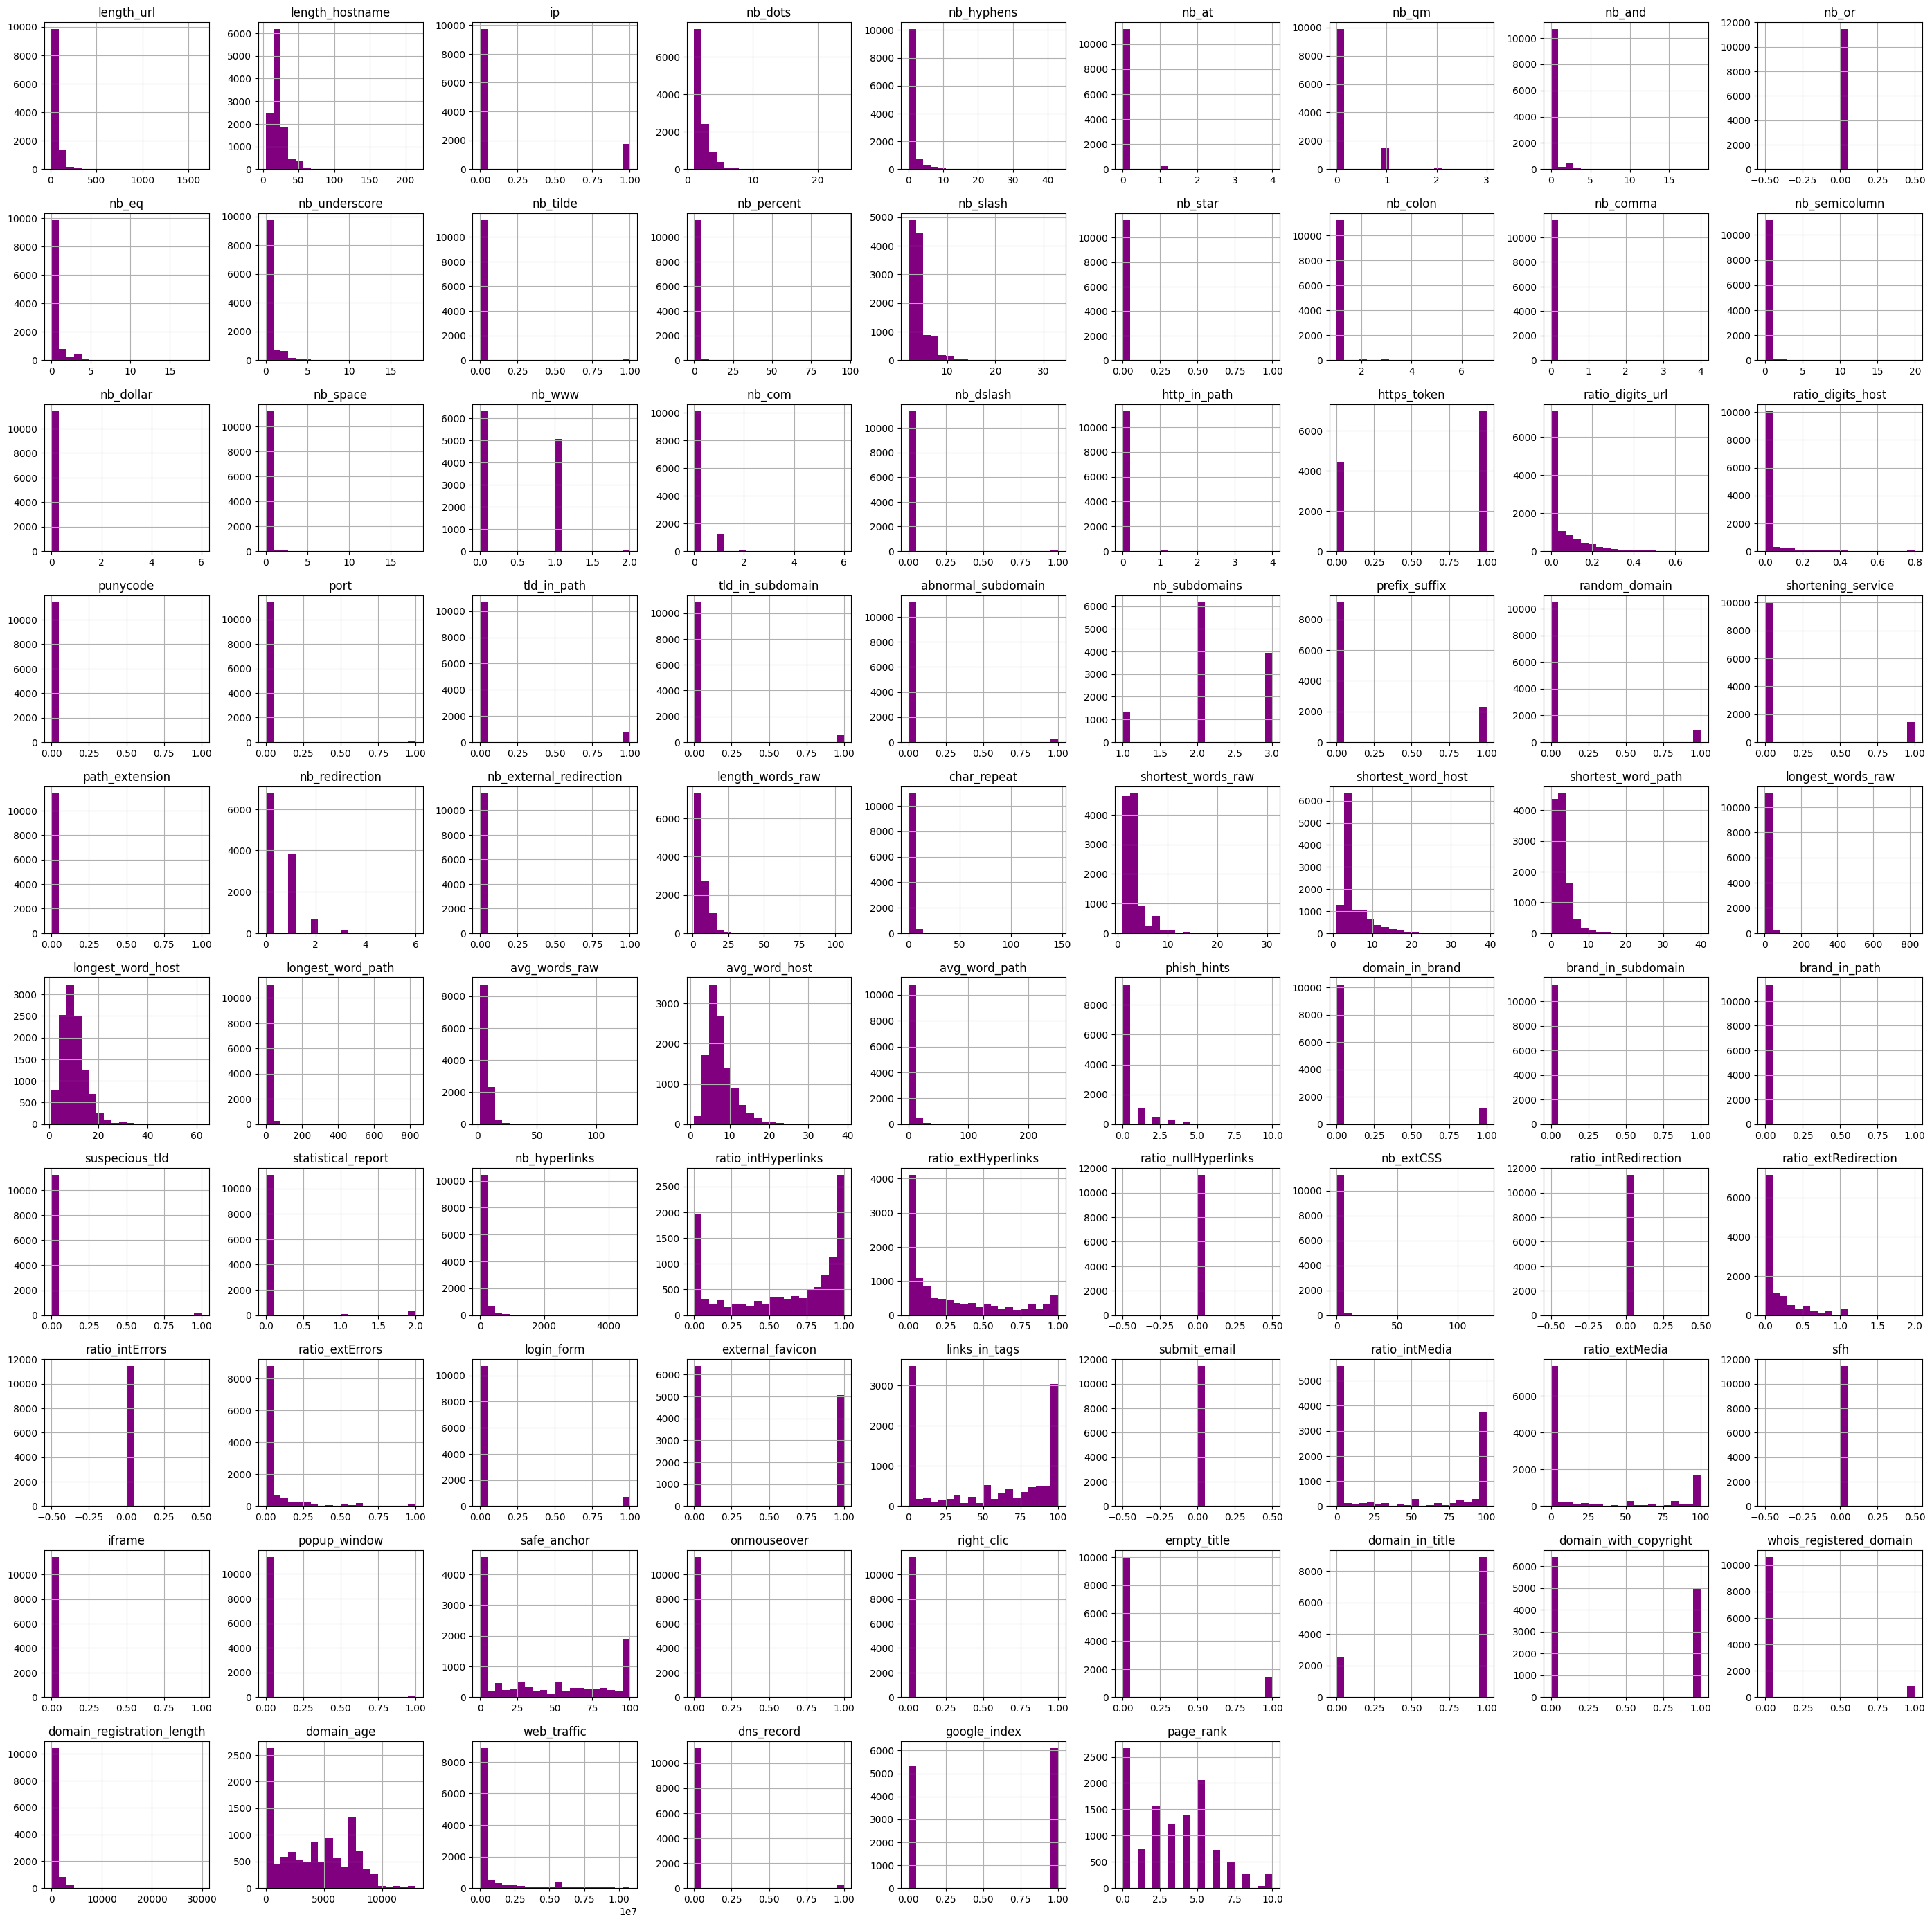

In [ ]:
#Plotting the data distribution
df.hist(bins = 20,figsize = (35,35),color='purple')
plt.show()

In [ ]:
#checking the data for null or missing values
null_counts=df.isnull().sum()
print(null_counts)
len(null_counts)

url                0
length_url         0
length_hostname    0
ip                 0
nb_dots            0
                  ..
web_traffic        0
dns_record         0
google_index       0
page_rank          0
status             0
Length: 89, dtype: int64


89

In [ ]:
obj = df.isnull().sum()
for key,value in obj.items():
    print(key,",",value)


url , 0
length_url , 0
length_hostname , 0
ip , 0
nb_dots , 0
nb_hyphens , 0
nb_at , 0
nb_qm , 0
nb_and , 0
nb_or , 0
nb_eq , 0
nb_underscore , 0
nb_tilde , 0
nb_percent , 0
nb_slash , 0
nb_star , 0
nb_colon , 0
nb_comma , 0
nb_semicolumn , 0
nb_dollar , 0
nb_space , 0
nb_www , 0
nb_com , 0
nb_dslash , 0
http_in_path , 0
https_token , 0
ratio_digits_url , 0
ratio_digits_host , 0
punycode , 0
port , 0
tld_in_path , 0
tld_in_subdomain , 0
abnormal_subdomain , 0
nb_subdomains , 0
prefix_suffix , 0
random_domain , 0
shortening_service , 0
path_extension , 0
nb_redirection , 0
nb_external_redirection , 0
length_words_raw , 0
char_repeat , 0
shortest_words_raw , 0
shortest_word_host , 0
shortest_word_path , 0
longest_words_raw , 0
longest_word_host , 0
longest_word_path , 0
avg_words_raw , 0
avg_word_host , 0
avg_word_path , 0
phish_hints , 0
domain_in_brand , 0
brand_in_subdomain , 0
brand_in_path , 0
suspecious_tld , 0
statistical_report , 0
nb_hyperlinks , 0
ratio_intHyperlinks , 0
ratio_

In [ ]:
df[df.duplicated()]

Empty DataFrame
Columns: [url, length_url, length_hostname, ip, nb_dots, nb_hyphens, nb_at, nb_qm, nb_and, nb_or, nb_eq, nb_underscore, nb_tilde, nb_percent, nb_slash, nb_star, nb_colon, nb_comma, nb_semicolumn, nb_dollar, nb_space, nb_www, nb_com, nb_dslash, http_in_path, https_token, ratio_digits_url, ratio_digits_host, punycode, port, tld_in_path, tld_in_subdomain, abnormal_subdomain, nb_subdomains, prefix_suffix, random_domain, shortening_service, path_extension, nb_redirection, nb_external_redirection, length_words_raw, char_repeat, shortest_words_raw, shortest_word_host, shortest_word_path, longest_words_raw, longest_word_host, longest_word_path, avg_words_raw, avg_word_host, avg_word_path, phish_hints, domain_in_brand, brand_in_subdomain, brand_in_path, suspecious_tld, statistical_report, nb_hyperlinks, ratio_intHyperlinks, ratio_extHyperlinks, ratio_nullHyperlinks, nb_extCSS, ratio_intRedirection, ratio_extRedirection, ratio_intErrors, ratio_extErrors, login_form, external_favicon, links_in_tags, submit_email, ratio_intMedia, ratio_extMedia, sfh, iframe, popup_window, safe_anchor, onmouseover, right_clic, empty_title, domain_in_title, domain_with_copyright, whois_registered_domain, domain_registration_length, domain_age, web_traffic, dns_record, google_index, page_rank, status]
Index: []

[0 rows x 89 columns]

In [ ]:
df[df.duplicated(keep=False)]

Empty DataFrame
Columns: [url, length_url, length_hostname, ip, nb_dots, nb_hyphens, nb_at, nb_qm, nb_and, nb_or, nb_eq, nb_underscore, nb_tilde, nb_percent, nb_slash, nb_star, nb_colon, nb_comma, nb_semicolumn, nb_dollar, nb_space, nb_www, nb_com, nb_dslash, http_in_path, https_token, ratio_digits_url, ratio_digits_host, punycode, port, tld_in_path, tld_in_subdomain, abnormal_subdomain, nb_subdomains, prefix_suffix, random_domain, shortening_service, path_extension, nb_redirection, nb_external_redirection, length_words_raw, char_repeat, shortest_words_raw, shortest_word_host, shortest_word_path, longest_words_raw, longest_word_host, longest_word_path, avg_words_raw, avg_word_host, avg_word_path, phish_hints, domain_in_brand, brand_in_subdomain, brand_in_path, suspecious_tld, statistical_report, nb_hyperlinks, ratio_intHyperlinks, ratio_extHyperlinks, ratio_nullHyperlinks, nb_extCSS, ratio_intRedirection, ratio_extRedirection, ratio_intErrors, ratio_extErrors, login_form, external_favicon, links_in_tags, submit_email, ratio_intMedia, ratio_extMedia, sfh, iframe, popup_window, safe_anchor, onmouseover, right_clic, empty_title, domain_in_title, domain_with_copyright, whois_registered_domain, domain_registration_length, domain_age, web_traffic, dns_record, google_index, page_rank, status]
Index: []

[0 rows x 89 columns]

In [ ]:
df[df.duplicated(keep="last")]

Empty DataFrame
Columns: [url, length_url, length_hostname, ip, nb_dots, nb_hyphens, nb_at, nb_qm, nb_and, nb_or, nb_eq, nb_underscore, nb_tilde, nb_percent, nb_slash, nb_star, nb_colon, nb_comma, nb_semicolumn, nb_dollar, nb_space, nb_www, nb_com, nb_dslash, http_in_path, https_token, ratio_digits_url, ratio_digits_host, punycode, port, tld_in_path, tld_in_subdomain, abnormal_subdomain, nb_subdomains, prefix_suffix, random_domain, shortening_service, path_extension, nb_redirection, nb_external_redirection, length_words_raw, char_repeat, shortest_words_raw, shortest_word_host, shortest_word_path, longest_words_raw, longest_word_host, longest_word_path, avg_words_raw, avg_word_host, avg_word_path, phish_hints, domain_in_brand, brand_in_subdomain, brand_in_path, suspecious_tld, statistical_report, nb_hyperlinks, ratio_intHyperlinks, ratio_extHyperlinks, ratio_nullHyperlinks, nb_extCSS, ratio_intRedirection, ratio_extRedirection, ratio_intErrors, ratio_extErrors, login_form, external_favicon, links_in_tags, submit_email, ratio_intMedia, ratio_extMedia, sfh, iframe, popup_window, safe_anchor, onmouseover, right_clic, empty_title, domain_in_title, domain_with_copyright, whois_registered_domain, domain_registration_length, domain_age, web_traffic, dns_record, google_index, page_rank, status]
Index: []

[0 rows x 89 columns]

In [ ]:
# Select categorical columns from the DataFrame
df_cat = df.select_dtypes(["object"])

#display the categorical columns
df_cat

url      status
0                  http://www.crestonwood.com/router.php  legitimate
1      http://shadetreetechnology.com/V4/validation/a...    phishing
2      https://support-appleld.com.secureupdate.duila...    phishing
3                                     http://rgipt.ac.in  legitimate
4      http://www.iracing.com/tracks/gateway-motorspo...  legitimate
...                                                  ...         ...
11425      http://www.fontspace.com/category/blackletter  legitimate
11426  http://www.budgetbots.com/server.php/Server%20...    phishing
11427  https://www.facebook.com/Interactive-Televisio...  legitimate
11428             http://www.mypublicdomainpictures.com/  legitimate
11429  http://174.139.46.123/ap/signin?openid.pape.ma...    phishing

[11430 rows x 2 columns]

In [ ]:
# Importing the LabelEncoder from scikit-learn for encoding categorical variables
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Create a LabelEncoder instance
le = LabelEncoder()

# Apply LabelEncoder to each categorical column
for i in df_cat:
    df_cat[i] = le.fit_transform(df_cat[i])

# Display the encoded categorical data
df_cat

url  status
0      4501       0
1      3063       1
2      8984       1
3      2778       0
4      5261       0
...     ...     ...
11425  4876       0
11426  4285       1
11427  9916       0
11428  5705       0
11429    62       1

[11430 rows x 2 columns]

In [ ]:
# Select numerical columns from the DataFrame
df_num = df.select_dtypes(["int", "float"])

#display the numerical columns
df_num

length_url  length_hostname  ip  nb_dots  nb_hyphens  nb_at  nb_qm  \
0              37               19   0        3           0      0      0   
1              77               23   1        1           0      0      0   
2             126               50   1        4           1      0      1   
3              18               11   0        2           0      0      0   
4              55               15   0        2           2      0      0   
...           ...              ...  ..      ...         ...    ...    ...   
11425          45               17   0        2           0      0      0   
11426          84               18   0        5           0      1      1   
11427         105               16   1        2           6      0      1   
11428          38               30   0        2           0      0      0   
11429         477               14   1       24           0      1      1   

       nb_and  nb_or  nb_eq  ...  empty_title  domain_in_title  \
0           0      0      0  ...            0                0   
1           0      0      0  ...            0                1   
2           2      0      3  ...            0                1   
3           0      0      0  ...            0                1   
4           0      0      0  ...            0                0   
...       ...    ...    ...  ...          ...              ...   
11425       0      0      0  ...            0                0   
11426       0      0      1  ...            0                1   
11427       0      0      1  ...            0                0   
11428       0      0      0  ...            0                1   
11429       9      0      9  ...            0                1   

       domain_with_copyright  whois_registered_domain  \
0                          1                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          1                        0   
...                      ...                      ...   
11425                      0                        0   
11426                      0                        0   
11427                      0                        0   
11428                      0                        0   
11429                      1                        1   

       domain_registration_length  domain_age  web_traffic  dns_record  \
0                              45          -1            0           1   
1                              77        5767            0           0   
2                              14        4004      5828815           0   
3                              62          -1       107721           0   
4                             224        8175         8725           0   
...                           ...         ...          ...         ...   
11425                         448        5396         3980           0   
11426                         211        6728            0           0   
11427                        2809        8515            8           0   
11428                          85        2836      2455493           0   
11429                           0          -1            0           1   

       google_index  page_rank  
0                 1          4  
1                 1          2  
2                 1          0  
3                 0          3  
4                 0          6  
...             ...        ...  
11425             0          6  
11426             1          0  
11427             1         10  
11428             0          4  
11429             1          0  

[11430 rows x 87 columns]

In [ ]:
# Concatenate the scaled numerical features with the categorical data
df_new = pd.concat([df_num,df_cat],axis = 1)

# Display the combined DataFrame with scaled numerical features and label encoded categorical data
df_new

length_url  length_hostname  ip  nb_dots  nb_hyphens  nb_at  nb_qm  \
0              37               19   0        3           0      0      0   
1              77               23   1        1           0      0      0   
2             126               50   1        4           1      0      1   
3              18               11   0        2           0      0      0   
4              55               15   0        2           2      0      0   
...           ...              ...  ..      ...         ...    ...    ...   
11425          45               17   0        2           0      0      0   
11426          84               18   0        5           0      1      1   
11427         105               16   1        2           6      0      1   
11428          38               30   0        2           0      0      0   
11429         477               14   1       24           0      1      1   

       nb_and  nb_or  nb_eq  ...  domain_with_copyright  \
0           0      0      0  ...                      1   
1           0      0      0  ...                      0   
2           2      0      3  ...                      0   
3           0      0      0  ...                      0   
4           0      0      0  ...                      1   
...       ...    ...    ...  ...                    ...   
11425       0      0      0  ...                      0   
11426       0      0      1  ...                      0   
11427       0      0      1  ...                      0   
11428       0      0      0  ...                      0   
11429       9      0      9  ...                      1   

       whois_registered_domain  domain_registration_length  domain_age  \
0                            0                          45          -1   
1                            0                          77        5767   
2                            0                          14        4004   
3                            0                          62          -1   
4                            0                         224        8175   
...                        ...                         ...         ...   
11425                        0                         448        5396   
11426                        0                         211        6728   
11427                        0                        2809        8515   
11428                        0                          85        2836   
11429                        1                           0          -1   

       web_traffic  dns_record  google_index  page_rank   url  status  
0                0           1             1          4  4501       0  
1                0           0             1          2  3063       1  
2          5828815           0             1          0  8984       1  
3           107721           0             0          3  2778       0  
4             8725           0             0          6  5261       0  
...            ...         ...           ...        ...   ...     ...  
11425         3980           0             0          6  4876       0  
11426            0           0             1          0  4285       1  
11427            8           0             1         10  9916       0  
11428      2455493           0             0          4  5705       0  
11429            0           1             1          0    62       1  

[11430 rows x 89 columns]

**Week 2**

# **Exploratory Data Analysis(EDA)**

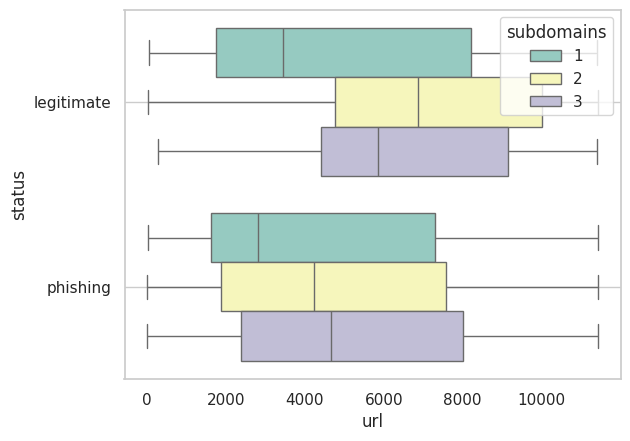

In [ ]:
sns.set(style="whitegrid")
sns.boxplot(x="url",y=df["status"],hue='nb_subdomains',data= df_new,palette="Set3")
plt.legend(title= "subdomains", loc= "upper right")
plt.grid()
plt.show()

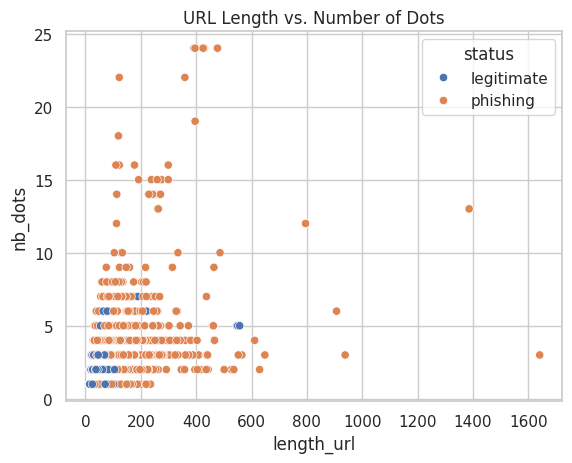

In [ ]:
sns.scatterplot(x='length_url', y='nb_dots', hue='status', data=df)
plt.title('URL Length vs. Number of Dots')
plt.show()

<Axes: xlabel='nb_subdomains', ylabel='Count'>

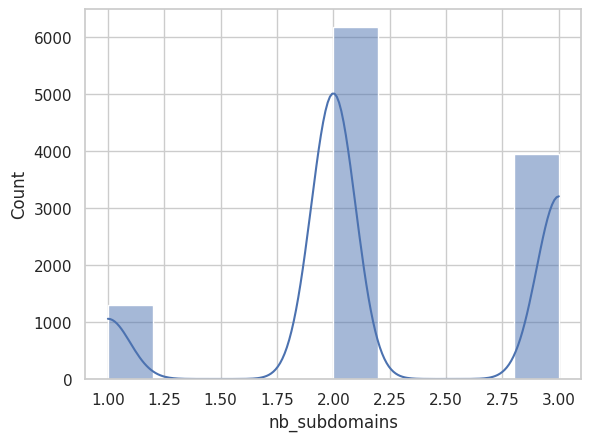

In [ ]:
sns.histplot(df["nb_subdomains"],bins=10,kde=True)

In [ ]:
corr = df_new.corr()
corr

length_url  length_hostname        ip   nb_dots  nb_hyphens  \
length_url         1.000000         0.223025  0.453961  0.443589    0.399564   
length_hostname    0.223025         1.000000  0.252013  0.408956    0.057702   
ip                 0.453961         0.252013  1.000000  0.288398    0.109860   
nb_dots            0.443589         0.408956  0.288398  1.000000    0.045099   
nb_hyphens         0.399564         0.057702  0.109860  0.045099    1.000000   
...                     ...              ...       ...       ...         ...   
dns_record         0.023357        -0.023344  0.127823  0.126659   -0.031477   
google_index       0.236395         0.213990  0.270743  0.209616   -0.018828   
page_rank         -0.102582        -0.159342 -0.218968 -0.097312    0.104341   
url               -0.036597        -0.044577 -0.066664 -0.028000    0.037406   
status             0.248580         0.238322  0.321698  0.207029   -0.100107   

                    nb_at     nb_qm    nb_and  nb_or     nb_eq  ...  \
length_url       0.150739  0.520930  0.576268    NaN  0.621745  ...   
length_hostname  0.071793  0.162400  0.145617    NaN  0.183405  ...   
ip               0.059401  0.405434  0.383262    NaN  0.440972  ...   
nb_dots          0.263283  0.347411  0.435798    NaN  0.414902  ...   
nb_hyphens       0.018770  0.036804  0.120487    NaN  0.107050  ...   
...                   ...       ...       ...    ...       ...  ...   
dns_record       0.031611  0.009441  0.076372    NaN  0.052159  ...   
google_index     0.113217  0.201260  0.129093    NaN  0.167385  ...   
page_rank       -0.066356 -0.123852 -0.126164    NaN -0.133089  ...   
url             -0.026399  0.034573  0.008760    NaN  0.026989  ...   
status           0.142915  0.294319  0.170546    NaN  0.233386  ...   

                 domain_with_copyright  whois_registered_domain  \
length_url                   -0.006476                -0.007082   
length_hostname               0.074707                -0.097794   
ip                            0.014561                 0.053246   
nb_dots                       0.055560                 0.056407   
nb_hyphens                    0.020297                -0.055794   
...                                ...                      ...   
dns_record                    0.043817                 0.213899   
google_index                 -0.143655                 0.040633   
page_rank                     0.058843                -0.155990   
url                           0.080432                -0.083426   
status                       -0.173098                 0.066979   

                 domain_registration_length  domain_age  web_traffic  \
length_url                         0.002799   -0.006798     0.072205   
length_hostname                   -0.041081    0.013854     0.163238   
ip                                -0.108869   -0.077020     0.167930   
nb_dots                           -0.024117   -0.007818     0.087969   
nb_hyphens                         0.038163    0.080104    -0.041464   
...                                     ...         ...          ...   
dns_record                        -0.060811   -0.068023    -0.007113   
google_index                      -0.134656   -0.210111     0.034099   
page_rank                          0.345751    0.589602    -0.209526   
url                                0.114034    0.116118     0.030854   
status                            -0.161719   -0.331889     0.060388   

                 dns_record  google_index  page_rank       url    status  
length_url         0.023357      0.236395  -0.102582 -0.036597  0.248580  
length_hostname   -0.023344      0.213990  -0.159342 -0.044577  0.238322  
ip                 0.127823      0.270743  -0.218968 -0.066664  0.321698  
nb_dots            0.126659      0.209616  -0.097312 -0.028000  0.207029  
nb_hyphens        -0.031477     -0.018828   0.104341  0.037406 -0.100107  
...                     ...           ...        ...       ...       ...  
dns_reco

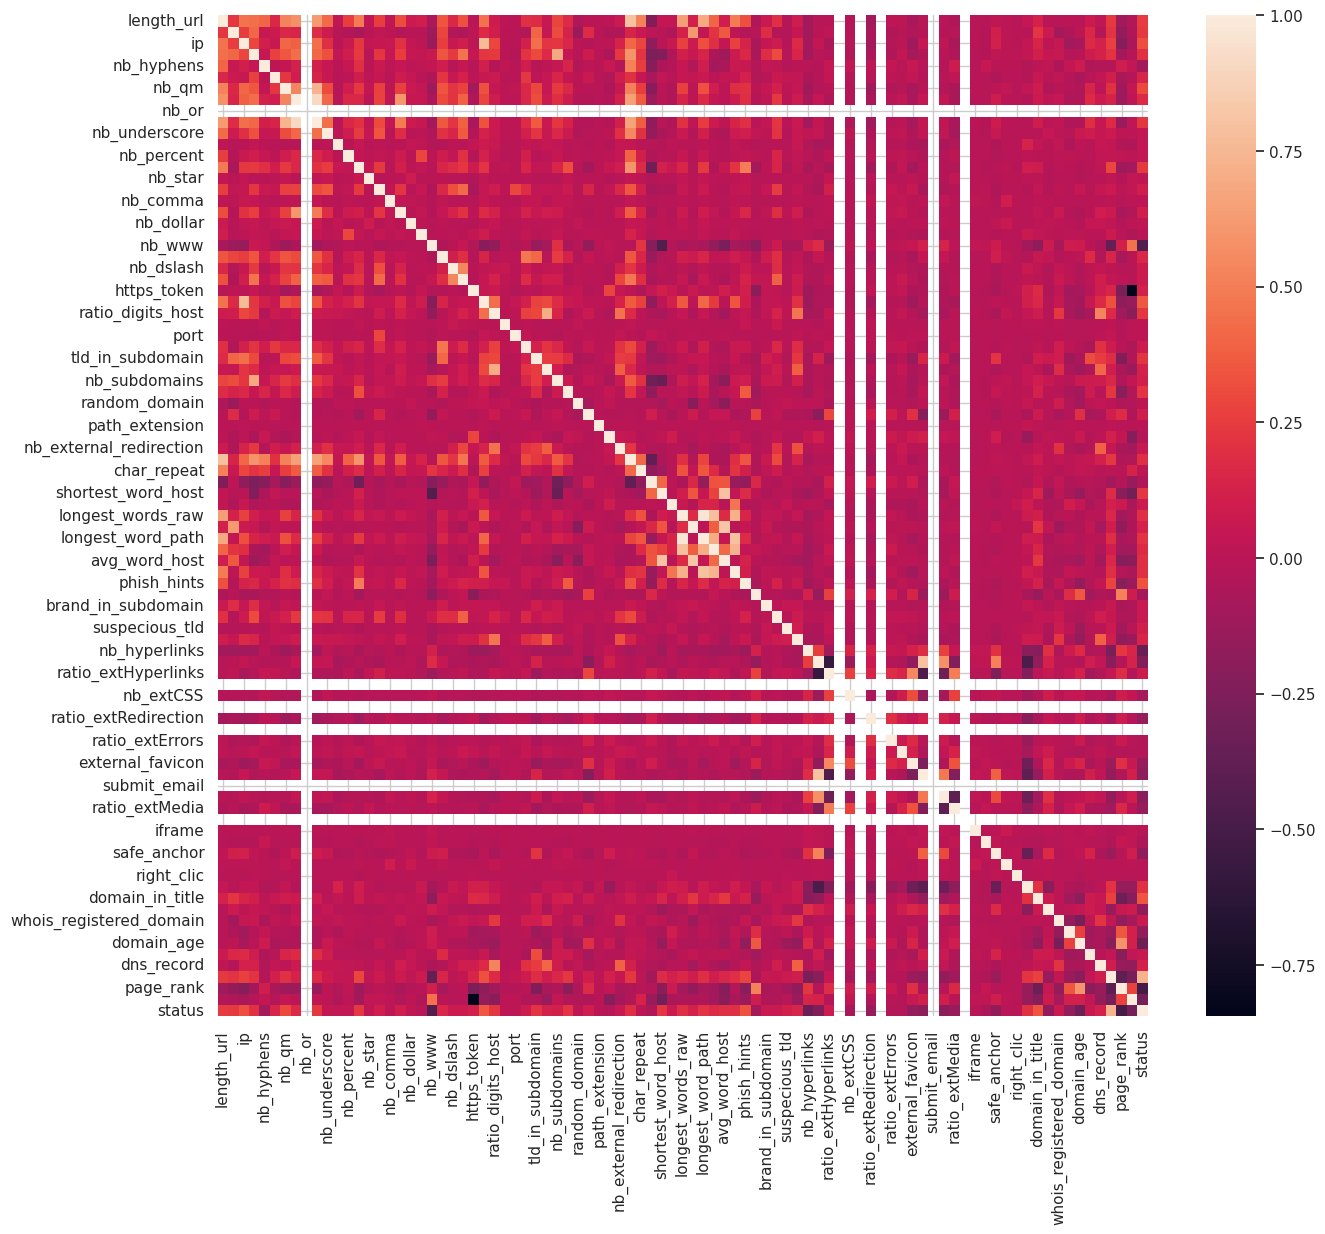

In [ ]:
#Correlation heatmap

plt.figure(figsize=(15,13))
sns.heatmap(corr)
plt.show()

In [ ]:
df2=df_new[["length_url","google_index","page_rank","web_traffic"]]
df2

length_url  google_index  page_rank  web_traffic
0              37             1          4            0
1              77             1          2            0
2             126             1          0      5828815
3              18             0          3       107721
4              55             0          6         8725
...           ...           ...        ...          ...
11425          45             0          6         3980
11426          84             1          0            0
11427         105             1         10            8
11428          38             0          4      2455493
11429         477             1          0            0

[11430 rows x 4 columns]

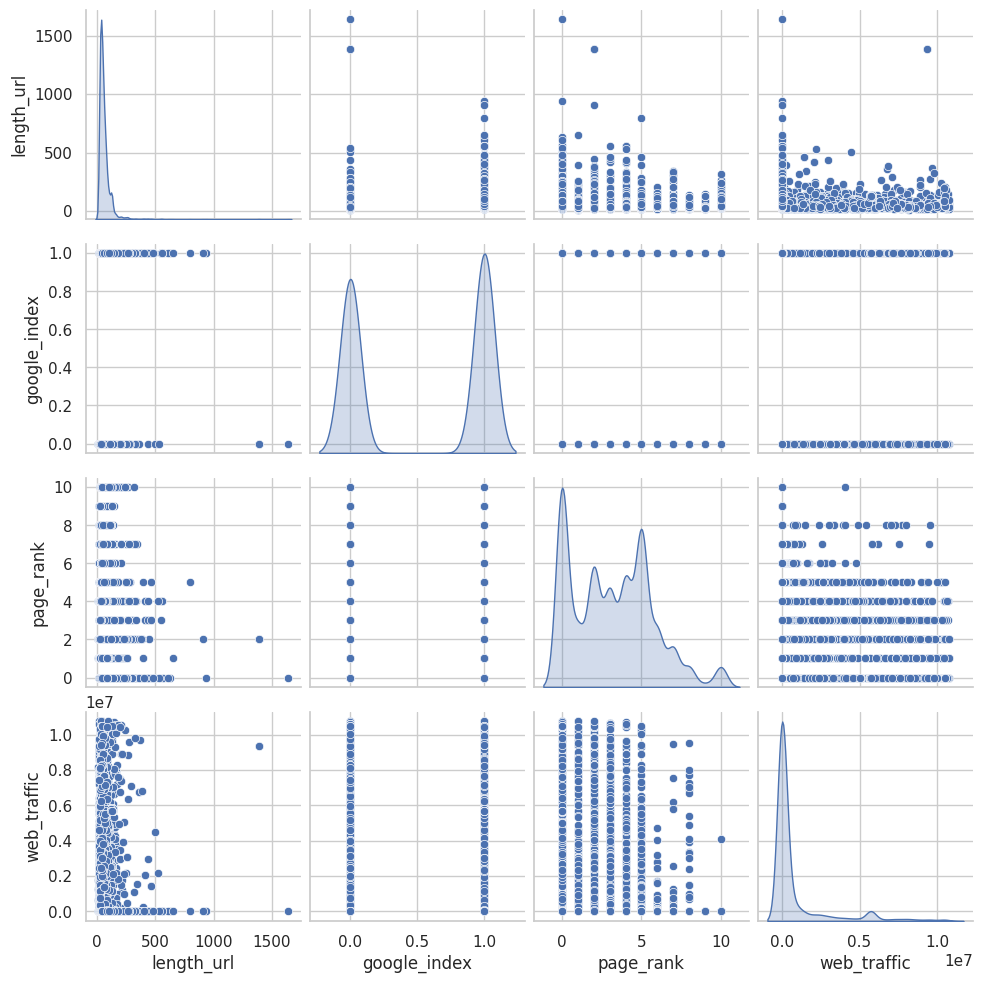

In [ ]:
sns.pairplot(df2,diag_kind='kde')
plt.show()

(0.0, 700.0)

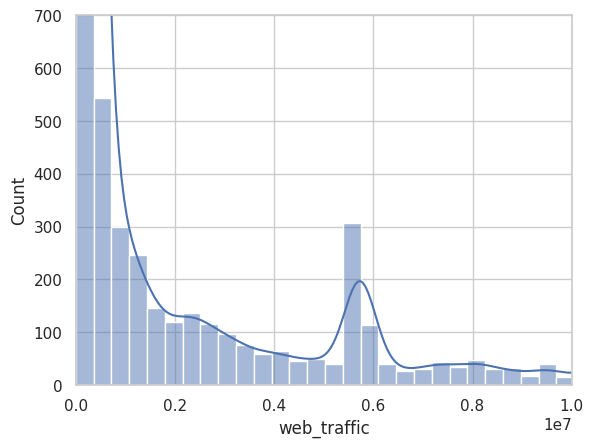

In [ ]:
sns.histplot(df["web_traffic"],bins=30,kde=True)
plt.xlim(0, 1e7)
plt.ylim(0,700)

In [ ]:
df3=df_new[["nb_dots","nb_hyphens","nb_subdomains","nb_hyperlinks","https_token"]]
df3

nb_dots  nb_hyphens  nb_subdomains  nb_hyperlinks  https_token
0            3           0              3             17            1
1            1           0              1             30            1
2            4           1              3              4            0
3            2           0              2            149            1
4            2           2              2            102            1
...        ...         ...            ...            ...          ...
11425        2           0              2            199            1
11426        5           0              3              3            1
11427        2           6              2             68            0
11428        2           0              2             32            1
11429       24           0              3             21            1

[11430 rows x 5 columns]

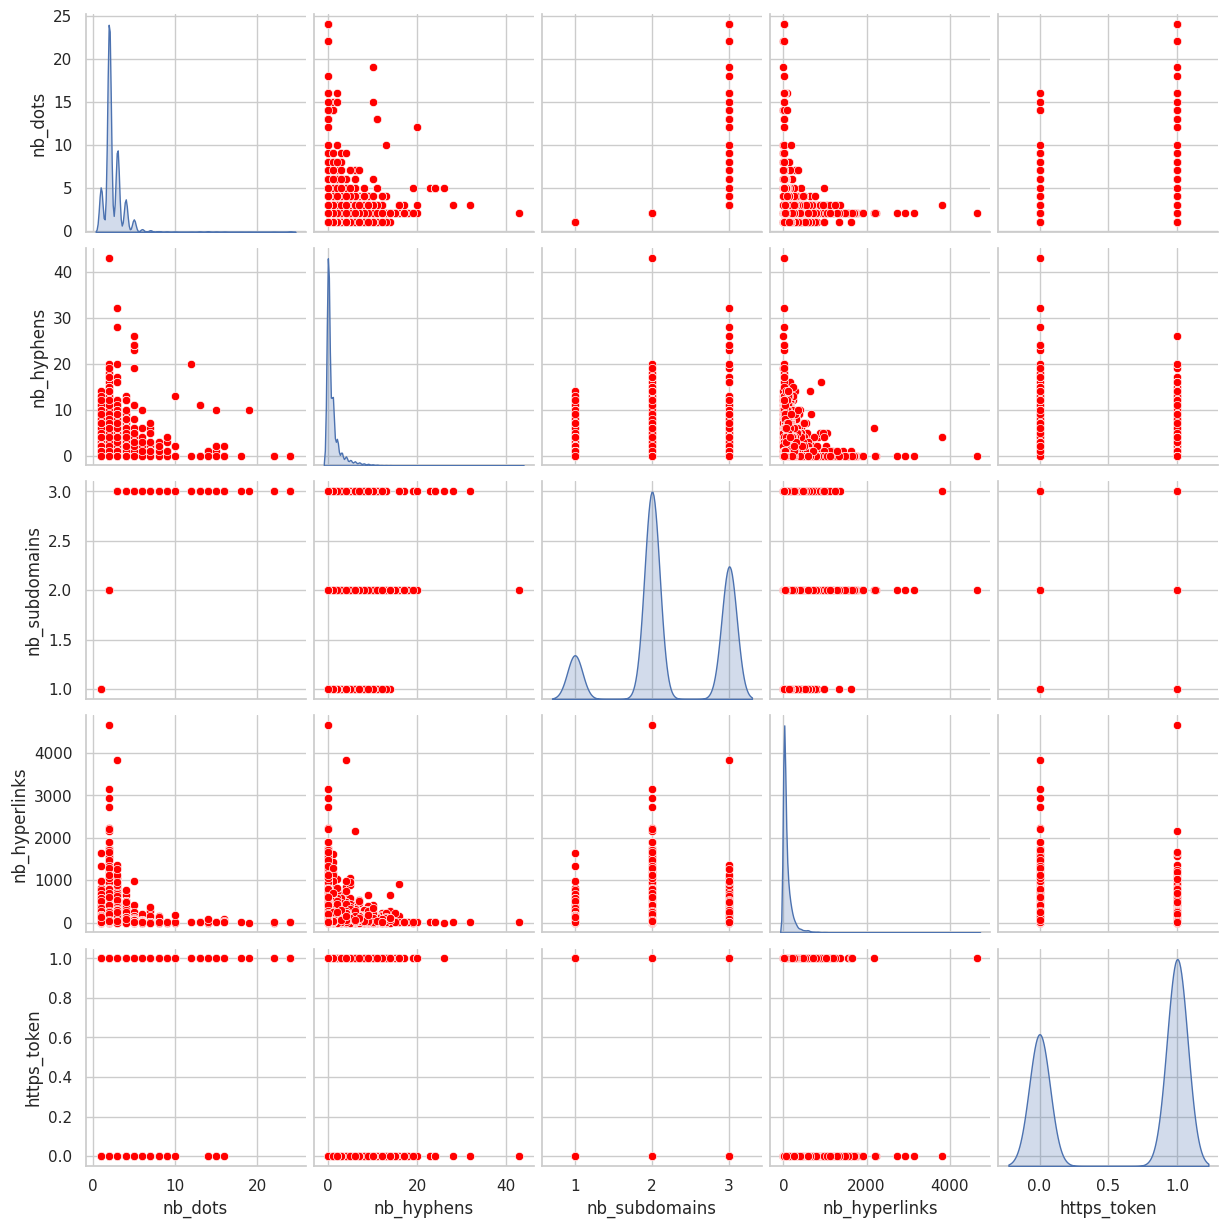

In [ ]:
sns.pairplot(df3,diag_kind='kde', plot_kws={'color': 'red'})
plt.show()

**Week 3**

# **Data Preprocessing**

In [ ]:
#checking the data for null or missing values
null_counts=df.isnull().sum()
print(null_counts)
len(null_counts)

In [ ]:
obj = df.isnull().sum()
for key,value in obj.items():
    print(key,",",value)

url , 0
length_url , 0
length_hostname , 0
ip , 0
nb_dots , 0
nb_hyphens , 0
nb_at , 0
nb_qm , 0
nb_and , 0
nb_or , 0
nb_eq , 0
nb_underscore , 0
nb_tilde , 0
nb_percent , 0
nb_slash , 0
nb_star , 0
nb_colon , 0
nb_comma , 0
nb_semicolumn , 0
nb_dollar , 0
nb_space , 0
nb_www , 0
nb_com , 0
nb_dslash , 0
http_in_path , 0
https_token , 0
ratio_digits_url , 0
ratio_digits_host , 0
punycode , 0
port , 0
tld_in_path , 0
tld_in_subdomain , 0
abnormal_subdomain , 0
nb_subdomains , 0
prefix_suffix , 0
random_domain , 0
shortening_service , 0
path_extension , 0
nb_redirection , 0
nb_external_redirection , 0
length_words_raw , 0
char_repeat , 0
shortest_words_raw , 0
shortest_word_host , 0
shortest_word_path , 0
longest_words_raw , 0
longest_word_host , 0
longest_word_path , 0
avg_words_raw , 0
avg_word_host , 0
avg_word_path , 0
phish_hints , 0
domain_in_brand , 0
brand_in_subdomain , 0
brand_in_path , 0
suspecious_tld , 0
statistical_report , 0
nb_hyperlinks , 0
ratio_intHyperlinks , 0
ratio_

In [ ]:
# Checking for duplicates in the dataset
df[df.duplicated()]

Empty DataFrame
Columns: [url, length_url, length_hostname, ip, nb_dots, nb_hyphens, nb_at, nb_qm, nb_and, nb_or, nb_eq, nb_underscore, nb_tilde, nb_percent, nb_slash, nb_star, nb_colon, nb_comma, nb_semicolumn, nb_dollar, nb_space, nb_www, nb_com, nb_dslash, http_in_path, https_token, ratio_digits_url, ratio_digits_host, punycode, port, tld_in_path, tld_in_subdomain, abnormal_subdomain, nb_subdomains, prefix_suffix, random_domain, shortening_service, path_extension, nb_redirection, nb_external_redirection, length_words_raw, char_repeat, shortest_words_raw, shortest_word_host, shortest_word_path, longest_words_raw, longest_word_host, longest_word_path, avg_words_raw, avg_word_host, avg_word_path, phish_hints, domain_in_brand, brand_in_subdomain, brand_in_path, suspecious_tld, statistical_report, nb_hyperlinks, ratio_intHyperlinks, ratio_extHyperlinks, ratio_nullHyperlinks, nb_extCSS, ratio_intRedirection, ratio_extRedirection, ratio_intErrors, ratio_extErrors, login_form, external_favicon, links_in_tags, submit_email, ratio_intMedia, ratio_extMedia, sfh, iframe, popup_window, safe_anchor, onmouseover, right_clic, empty_title, domain_in_title, domain_with_copyright, whois_registered_domain, domain_registration_length, domain_age, web_traffic, dns_record, google_index, page_rank, status]
Index: []

[0 rows x 89 columns]

In [ ]:
df[df.duplicated(keep=False)]

Empty DataFrame
Columns: [url, length_url, length_hostname, ip, nb_dots, nb_hyphens, nb_at, nb_qm, nb_and, nb_or, nb_eq, nb_underscore, nb_tilde, nb_percent, nb_slash, nb_star, nb_colon, nb_comma, nb_semicolumn, nb_dollar, nb_space, nb_www, nb_com, nb_dslash, http_in_path, https_token, ratio_digits_url, ratio_digits_host, punycode, port, tld_in_path, tld_in_subdomain, abnormal_subdomain, nb_subdomains, prefix_suffix, random_domain, shortening_service, path_extension, nb_redirection, nb_external_redirection, length_words_raw, char_repeat, shortest_words_raw, shortest_word_host, shortest_word_path, longest_words_raw, longest_word_host, longest_word_path, avg_words_raw, avg_word_host, avg_word_path, phish_hints, domain_in_brand, brand_in_subdomain, brand_in_path, suspecious_tld, statistical_report, nb_hyperlinks, ratio_intHyperlinks, ratio_extHyperlinks, ratio_nullHyperlinks, nb_extCSS, ratio_intRedirection, ratio_extRedirection, ratio_intErrors, ratio_extErrors, login_form, external_favicon, links_in_tags, submit_email, ratio_intMedia, ratio_extMedia, sfh, iframe, popup_window, safe_anchor, onmouseover, right_clic, empty_title, domain_in_title, domain_with_copyright, whois_registered_domain, domain_registration_length, domain_age, web_traffic, dns_record, google_index, page_rank, status]
Index: []

[0 rows x 89 columns]

In [ ]:
df[df.duplicated(keep="last")]

Empty DataFrame
Columns: [url, length_url, length_hostname, ip, nb_dots, nb_hyphens, nb_at, nb_qm, nb_and, nb_or, nb_eq, nb_underscore, nb_tilde, nb_percent, nb_slash, nb_star, nb_colon, nb_comma, nb_semicolumn, nb_dollar, nb_space, nb_www, nb_com, nb_dslash, http_in_path, https_token, ratio_digits_url, ratio_digits_host, punycode, port, tld_in_path, tld_in_subdomain, abnormal_subdomain, nb_subdomains, prefix_suffix, random_domain, shortening_service, path_extension, nb_redirection, nb_external_redirection, length_words_raw, char_repeat, shortest_words_raw, shortest_word_host, shortest_word_path, longest_words_raw, longest_word_host, longest_word_path, avg_words_raw, avg_word_host, avg_word_path, phish_hints, domain_in_brand, brand_in_subdomain, brand_in_path, suspecious_tld, statistical_report, nb_hyperlinks, ratio_intHyperlinks, ratio_extHyperlinks, ratio_nullHyperlinks, nb_extCSS, ratio_intRedirection, ratio_extRedirection, ratio_intErrors, ratio_extErrors, login_form, external_favicon, links_in_tags, submit_email, ratio_intMedia, ratio_extMedia, sfh, iframe, popup_window, safe_anchor, onmouseover, right_clic, empty_title, domain_in_title, domain_with_copyright, whois_registered_domain, domain_registration_length, domain_age, web_traffic, dns_record, google_index, page_rank, status]
Index: []

[0 rows x 89 columns]

# Encoding Categorical Variables

In [4]:
# Select categorical columns from the DataFrame
df_cat = df.select_dtypes(["object"])

#display the categorical columns
df_cat

url      status
0                  http://www.crestonwood.com/router.php  legitimate
1      http://shadetreetechnology.com/V4/validation/a...    phishing
2      https://support-appleld.com.secureupdate.duila...    phishing
3                                     http://rgipt.ac.in  legitimate
4      http://www.iracing.com/tracks/gateway-motorspo...  legitimate
...                                                  ...         ...
11425      http://www.fontspace.com/category/blackletter  legitimate
11426  http://www.budgetbots.com/server.php/Server%20...    phishing
11427  https://www.facebook.com/Interactive-Televisio...  legitimate
11428             http://www.mypublicdomainpictures.com/  legitimate
11429  http://174.139.46.123/ap/signin?openid.pape.ma...    phishing

[11430 rows x 2 columns]

In [5]:
# Importing the LabelEncoder from scikit-learn for encoding categorical variables
from sklearn.preprocessing import LabelEncoder

In [6]:
# Create a LabelEncoder instance
le = LabelEncoder()

# Apply LabelEncoder to each categorical column
for i in df_cat:
    df_cat[i] = le.fit_transform(df_cat[i])

# Display the encoded categorical data
df_cat

url  status
0      4501       0
1      3063       1
2      8984       1
3      2778       0
4      5261       0
...     ...     ...
11425  4876       0
11426  4285       1
11427  9916       0
11428  5705       0
11429    62       1

[11430 rows x 2 columns]

# Normalization or Scaling techniques for numerical features

In [7]:
# Select numerical columns from the DataFrame
df_num = df.select_dtypes(["int", "float"])

#display the numerical columns
df_num

length_url  length_hostname  ip  nb_dots  nb_hyphens  nb_at  nb_qm  \
0              37               19   0        3           0      0      0   
1              77               23   1        1           0      0      0   
2             126               50   1        4           1      0      1   
3              18               11   0        2           0      0      0   
4              55               15   0        2           2      0      0   
...           ...              ...  ..      ...         ...    ...    ...   
11425          45               17   0        2           0      0      0   
11426          84               18   0        5           0      1      1   
11427         105               16   1        2           6      0      1   
11428          38               30   0        2           0      0      0   
11429         477               14   1       24           0      1      1   

       nb_and  nb_or  nb_eq  ...  empty_title  domain_in_title  \
0           0      0      0  ...            0                0   
1           0      0      0  ...            0                1   
2           2      0      3  ...            0                1   
3           0      0      0  ...            0                1   
4           0      0      0  ...            0                0   
...       ...    ...    ...  ...          ...              ...   
11425       0      0      0  ...            0                0   
11426       0      0      1  ...            0                1   
11427       0      0      1  ...            0                0   
11428       0      0      0  ...            0                1   
11429       9      0      9  ...            0                1   

       domain_with_copyright  whois_registered_domain  \
0                          1                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          1                        0   
...                      ...                      ...   
11425                      0                        0   
11426                      0                        0   
11427                      0                        0   
11428                      0                        0   
11429                      1                        1   

       domain_registration_length  domain_age  web_traffic  dns_record  \
0                              45          -1            0           1   
1                              77        5767            0           0   
2                              14        4004      5828815           0   
3                              62          -1       107721           0   
4                             224        8175         8725           0   
...                           ...         ...          ...         ...   
11425                         448        5396         3980           0   
11426                         211        6728            0           0   
11427                        2809        8515            8           0   
11428                          85        2836      2455493           0   
11429                           0          -1            0           1   

       google_index  page_rank  
0                 1          4  
1                 1          2  
2                 1          0  
3                 0          3  
4                 0          6  
...             ...        ...  
11425             0          6  
11426             1          0  
11427             1         10  
11428             0          4  
11429             1          0  

[11430 rows x 87 columns]

# **Feature Scaling**

In [8]:
# Importing StandardScaler from scikit-learn for feature scaling
from sklearn.preprocessing import StandardScaler

In [9]:
# Create an instance of StandardScaler for feature scaling
sc = StandardScaler()

In [10]:
# Scale the numerical features using StandardScaler
x_scaled = sc.fit_transform(df_num)

# Display the scaled numerical features
x_scaled

array([[-0.43632748, -0.19396372, -0.42102044, ...,  6.97822701,
         0.93426411,  0.32097385],
       [ 0.28706655,  0.17720743,  2.37518157, ..., -0.14330288,
         0.93426411, -0.46740717],
       [ 1.17322424,  2.6826127 ,  2.37518157, ..., -0.14330288,
         0.93426411, -1.25578819],
       ...,
       [ 0.79344237, -0.47234208,  2.37518157, ..., -0.14330288,
         0.93426411,  2.68611691],
       [-0.41824263,  0.82675695, -0.42102044, ..., -0.14330288,
        -1.07036115,  0.32097385],
       [ 7.52100688, -0.65792766,  2.37518157, ...,  6.97822701,
         0.93426411, -1.25578819]])

In [11]:
# Convert the scaled numerical data back to a DataFrame with original column names
df_num = pd.DataFrame(data = x_scaled,columns = df_num.columns)

# Display the DataFrame with scaled numerical features
df_num

length_url  length_hostname        ip    nb_dots  nb_hyphens     nb_at  \
0       -0.436327        -0.193964 -0.421020   0.379116   -0.477984 -0.142915   
1        0.287067         0.177207  2.375182  -1.081136   -0.477984 -0.142915   
2        1.173224         2.682613  2.375182   1.109242    0.001174 -0.142915   
3       -0.779940        -0.936306 -0.421020  -0.351010   -0.477984 -0.142915   
4       -0.110800        -0.565135 -0.421020  -0.351010    0.480332 -0.142915   
...           ...              ...       ...        ...         ...       ...   
11425   -0.291649        -0.379549 -0.421020  -0.351010   -0.477984 -0.142915   
11426    0.413661        -0.286757 -0.421020   1.839369   -0.477984  6.288241   
11427    0.793442        -0.472342  2.375182  -0.351010    2.396963 -0.142915   
11428   -0.418243         0.826757 -0.421020  -0.351010   -0.477984 -0.142915   
11429    7.521007        -0.657928  2.375182  15.711766   -0.477984  6.288241   

          nb_qm     nb_and  nb_or     nb_eq  ...  empty_title  \
0     -0.387464  -0.197604    0.0 -0.293683  ...    -0.377549   
1     -0.387464  -0.197604    0.0 -0.293683  ...    -0.377549   
2      2.356473   2.237556    0.0  2.711505  ...    -0.377549   
3     -0.387464  -0.197604    0.0 -0.293683  ...    -0.377549   
4     -0.387464  -0.197604    0.0 -0.293683  ...    -0.377549   
...         ...        ...    ...       ...  ...          ...   
11425 -0.387464  -0.197604    0.0 -0.293683  ...    -0.377549   
11426  2.356473  -0.197604    0.0  0.708047  ...    -0.377549   
11427  2.356473  -0.197604    0.0  0.708047  ...    -0.377549   
11428 -0.387464  -0.197604    0.0 -0.293683  ...    -0.377549   
11429  2.356473  10.760613    0.0  8.721882  ...    -0.377549   

       domain_in_title  domain_with_copyright  whois_registered_domain  \
0            -1.860473               1.129194                 -0.28037   
1             0.537498              -0.885587                 -0.28037   
2             0.537498              -0.885587                 -0.28037   
3             0.537498              -0.885587                 -0.28037   
4            -1.860473               1.129194                 -0.28037   
...                ...                    ...                      ...   
11425        -1.860473              -0.885587                 -0.28037   
11426         0.537498              -0.885587                 -0.28037   
11427        -1.860473              -0.885587                 -0.28037   
11428         0.537498              -0.885587                 -0.28037   
11429         0.537498               1.129194                  3.56672   

       domain_registration_length  domain_age  web_traffic  dns_record  \
0                       -0.549299   -1.307594    -0.429340    6.978227   
1                       -0.510022    0.548471    -0.429340   -0.143303   
2                       -0.587348   -0.018839     2.491612   -0.143303   
3                       -0.528433   -1.307594    -0.375359   -0.143303   
4                       -0.329595    1.323334    -0.424968   -0.143303   
...                           ...         ...          ...         ...   
11425                   -0.054659    0.429088    -0.427346   -0.143303   
11426                   -0.345551    0.857708    -0.429340   -0.143303   
11427                    2.843221    1.432741    -0.429336   -0.143303   
11428                   -0.500203   -0.394685     0.801163   -0.143303   
11429                   -0.604531   -1.307594    -0.429340    6.978227   

       google_index  page_rank  
0          0.934264   0.320974  
1          0.934264  -0.467407  
2          0.934264  -1.255788  
3         -1.070361  -0.073217  
4         -1.070361   1.109355  
...             ...        ...  
11425     -1.070361   1.109355  
11426      0.934264  -1.255788  
11427      0.934264   2.686117  
11428     -1.070361   0.320974  
11429      0.934264  -1.255788  

[11430 rows x 87 columns]

# **Concatenating numerical data and categorical data**

In [12]:
# Concatenate the scaled numerical features with the categorical data
df_new = pd.concat([df_num,df_cat],axis = 1)

# Display the combined DataFrame with scaled numerical features and label encoded categorical data
df_new

length_url  length_hostname        ip    nb_dots  nb_hyphens     nb_at  \
0       -0.436327        -0.193964 -0.421020   0.379116   -0.477984 -0.142915   
1        0.287067         0.177207  2.375182  -1.081136   -0.477984 -0.142915   
2        1.173224         2.682613  2.375182   1.109242    0.001174 -0.142915   
3       -0.779940        -0.936306 -0.421020  -0.351010   -0.477984 -0.142915   
4       -0.110800        -0.565135 -0.421020  -0.351010    0.480332 -0.142915   
...           ...              ...       ...        ...         ...       ...   
11425   -0.291649        -0.379549 -0.421020  -0.351010   -0.477984 -0.142915   
11426    0.413661        -0.286757 -0.421020   1.839369   -0.477984  6.288241   
11427    0.793442        -0.472342  2.375182  -0.351010    2.396963 -0.142915   
11428   -0.418243         0.826757 -0.421020  -0.351010   -0.477984 -0.142915   
11429    7.521007        -0.657928  2.375182  15.711766   -0.477984  6.288241   

          nb_qm     nb_and  nb_or     nb_eq  ...  domain_with_copyright  \
0     -0.387464  -0.197604    0.0 -0.293683  ...               1.129194   
1     -0.387464  -0.197604    0.0 -0.293683  ...              -0.885587   
2      2.356473   2.237556    0.0  2.711505  ...              -0.885587   
3     -0.387464  -0.197604    0.0 -0.293683  ...              -0.885587   
4     -0.387464  -0.197604    0.0 -0.293683  ...               1.129194   
...         ...        ...    ...       ...  ...                    ...   
11425 -0.387464  -0.197604    0.0 -0.293683  ...              -0.885587   
11426  2.356473  -0.197604    0.0  0.708047  ...              -0.885587   
11427  2.356473  -0.197604    0.0  0.708047  ...              -0.885587   
11428 -0.387464  -0.197604    0.0 -0.293683  ...              -0.885587   
11429  2.356473  10.760613    0.0  8.721882  ...               1.129194   

       whois_registered_domain  domain_registration_length  domain_age  \
0                     -0.28037                   -0.549299   -1.307594   
1                     -0.28037                   -0.510022    0.548471   
2                     -0.28037                   -0.587348   -0.018839   
3                     -0.28037                   -0.528433   -1.307594   
4                     -0.28037                   -0.329595    1.323334   
...                        ...                         ...         ...   
11425                 -0.28037                   -0.054659    0.429088   
11426                 -0.28037                   -0.345551    0.857708   
11427                 -0.28037                    2.843221    1.432741   
11428                 -0.28037                   -0.500203   -0.394685   
11429                  3.56672                   -0.604531   -1.307594   

       web_traffic  dns_record  google_index  page_rank   url  status  
0        -0.429340    6.978227      0.934264   0.320974  4501       0  
1        -0.429340   -0.143303      0.934264  -0.467407  3063       1  
2         2.491612   -0.143303      0.934264  -1.255788  8984       1  
3        -0.375359   -0.143303     -1.070361  -0.073217  2778       0  
4        -0.424968   -0.143303     -1.070361   1.109355  5261       0  
...            ...         ...           ...        ...   ...     ...  
11425    -0.427346   -0.143303     -1.070361   1.109355  4876       0  
11426    -0.429340   -0.143303      0.934264  -1.255788  4285       1  
11427    -0.429336   -0.143303      0.934264   2.686117  9916       0  
11428     0.801163   -0.143303     -1.070361   0.320974  5705       0  
11429    -0.429340    6.978227      0.934264  -1.255788    62       1  

[11430 rows x 89 columns]

# **Data Splitting**



In [13]:
# Splitting the dataset into X and y
y=df_new['status']
X=df_new.drop(['url','status'],axis=1)

In [14]:
# Checking some rows of X
X.head()

length_url  length_hostname        ip   nb_dots  nb_hyphens     nb_at  \
0   -0.436327        -0.193964 -0.421020  0.379116   -0.477984 -0.142915   
1    0.287067         0.177207  2.375182 -1.081136   -0.477984 -0.142915   
2    1.173224         2.682613  2.375182  1.109242    0.001174 -0.142915   
3   -0.779940        -0.936306 -0.421020 -0.351010   -0.477984 -0.142915   
4   -0.110800        -0.565135 -0.421020 -0.351010    0.480332 -0.142915   

      nb_qm    nb_and  nb_or     nb_eq  ...  empty_title  domain_in_title  \
0 -0.387464 -0.197604    0.0 -0.293683  ...    -0.377549        -1.860473   
1 -0.387464 -0.197604    0.0 -0.293683  ...    -0.377549         0.537498   
2  2.356473  2.237556    0.0  2.711505  ...    -0.377549         0.537498   
3 -0.387464 -0.197604    0.0 -0.293683  ...    -0.377549         0.537498   
4 -0.387464 -0.197604    0.0 -0.293683  ...    -0.377549        -1.860473   

   domain_with_copyright  whois_registered_domain  domain_registration_length  \
0               1.129194                 -0.28037                   -0.549299   
1              -0.885587                 -0.28037                   -0.510022   
2              -0.885587                 -0.28037                   -0.587348   
3              -0.885587                 -0.28037                   -0.528433   
4               1.129194                 -0.28037                   -0.329595   

   domain_age  web_traffic  dns_record  google_index  page_rank  
0   -1.307594    -0.429340    6.978227      0.934264   0.320974  
1    0.548471    -0.429340   -0.143303      0.934264  -0.467407  
2   -0.018839     2.491612   -0.143303      0.934264  -1.255788  
3   -1.307594    -0.375359   -0.143303     -1.070361  -0.073217  
4    1.323334    -0.424968   -0.143303     -1.070361   1.109355  

[5 rows x 87 columns]

In [15]:
# Checking some rows of y
y.head()

0    0
1    1
2    1
3    0
4    0
Name: status, dtype: int64

In [16]:
# Accumulating all the column names under one variable
cols =list(X.columns.values)
cols

['length_url',
 'length_hostname',
 'ip',
 'nb_dots',
 'nb_hyphens',
 'nb_at',
 'nb_qm',
 'nb_and',
 'nb_or',
 'nb_eq',
 'nb_underscore',
 'nb_tilde',
 'nb_percent',
 'nb_slash',
 'nb_star',
 'nb_colon',
 'nb_comma',
 'nb_semicolumn',
 'nb_dollar',
 'nb_space',
 'nb_www',
 'nb_com',
 'nb_dslash',
 'http_in_path',
 'https_token',
 'ratio_digits_url',
 'ratio_digits_host',
 'punycode',
 'port',
 'tld_in_path',
 'tld_in_subdomain',
 'abnormal_subdomain',
 'nb_subdomains',
 'prefix_suffix',
 'random_domain',
 'shortening_service',
 'path_extension',
 'nb_redirection',
 'nb_external_redirection',
 'length_words_raw',
 'char_repeat',
 'shortest_words_raw',
 'shortest_word_host',
 'shortest_word_path',
 'longest_words_raw',
 'longest_word_host',
 'longest_word_path',
 'avg_words_raw',
 'avg_word_host',
 'avg_word_path',
 'phish_hints',
 'domain_in_brand',
 'brand_in_subdomain',
 'brand_in_path',
 'suspecious_tld',
 'statistical_report',
 'nb_hyperlinks',
 'ratio_intHyperlinks',
 'ratio_extHyp

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=42)

In [ ]:
x_train.shape

(9144, 87)

In [ ]:
x_test.shape

(2286, 87)

In [ ]:
y_train.shape

(9144,)

In [ ]:
y_test.shape

(2286,)

**Week 4**

# Week 4: Feature Engineering

In [ ]:
corr_matrix = df_new.corr()

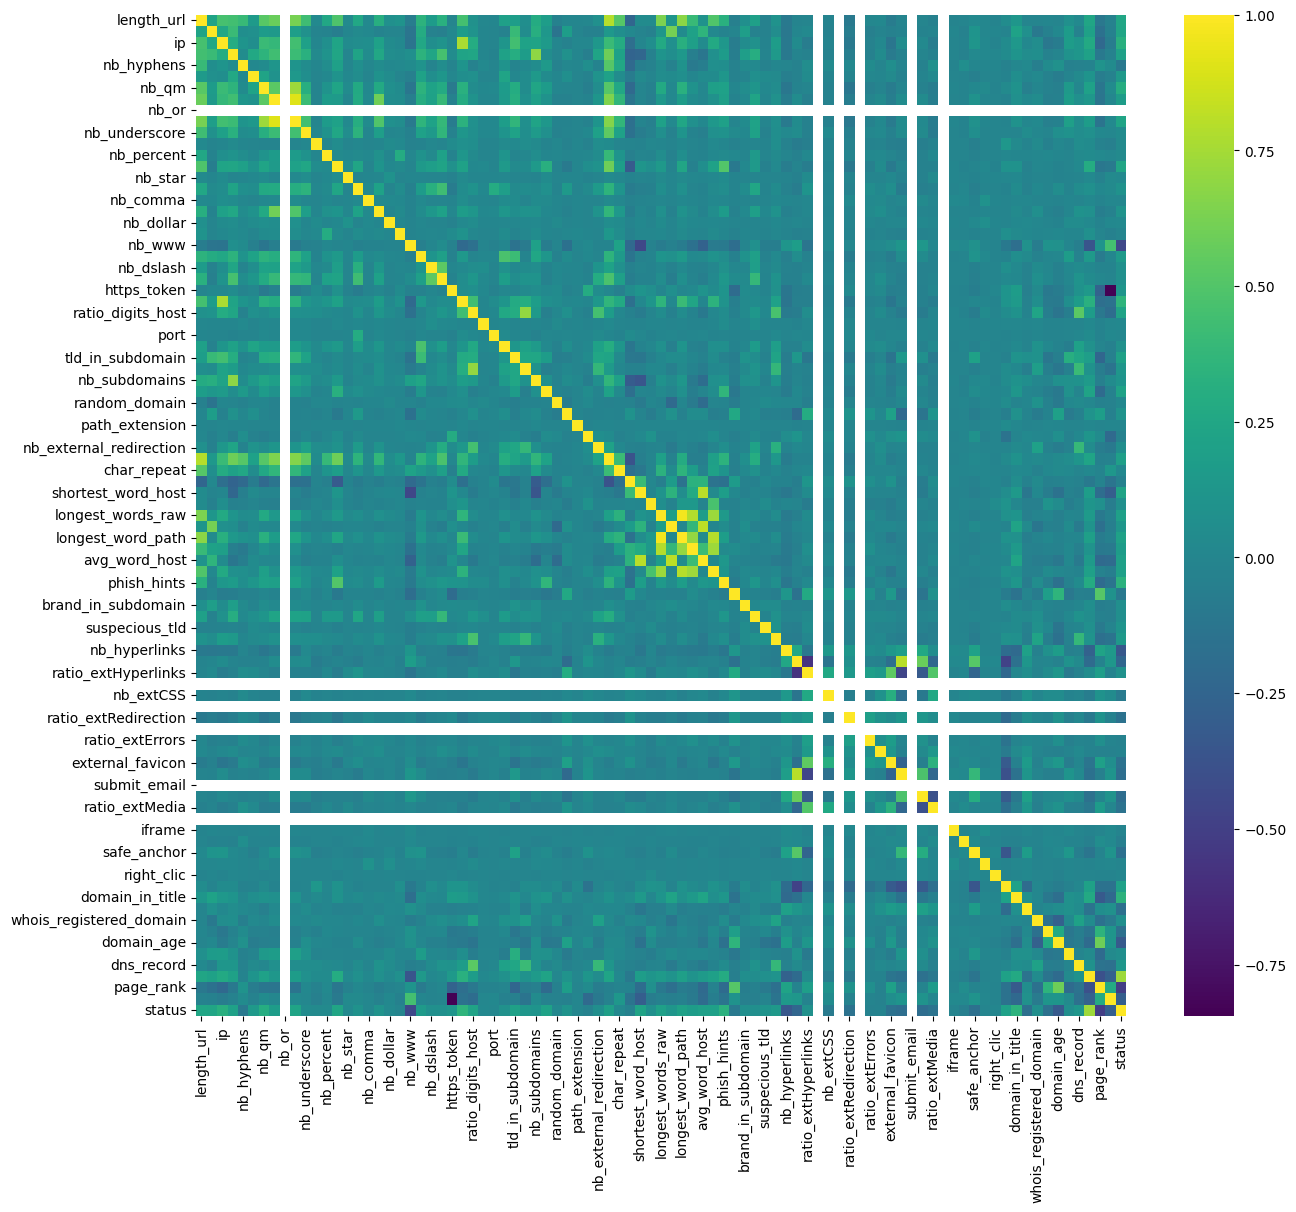

In [ ]:
#Correlation heatmap

plt.figure(figsize=(15,13))
sns.heatmap(corr_matrix,cmap="viridis")
plt.show()

length_url  length_hostname        ip    nb_dots  nb_hyphens     nb_at  \
0       -0.436327        -0.193964 -0.421020   0.379116   -0.477984 -0.142915   
1        0.287067         0.177207  2.375182  -1.081136   -0.477984 -0.142915   
2        1.173224         2.682613  2.375182   1.109242    0.001174 -0.142915   
3       -0.779940        -0.936306 -0.421020  -0.351010   -0.477984 -0.142915   
4       -0.110800        -0.565135 -0.421020  -0.351010    0.480332 -0.142915   
...           ...              ...       ...        ...         ...       ...   
11425   -0.291649        -0.379549 -0.421020  -0.351010   -0.477984 -0.142915   
11426    0.413661        -0.286757 -0.421020   1.839369   -0.477984  6.288241   
11427    0.793442        -0.472342  2.375182  -0.351010    2.396963 -0.142915   
11428   -0.418243         0.826757 -0.421020  -0.351010   -0.477984 -0.142915   
11429    7.521007        -0.657928  2.375182  15.711766   -0.477984  6.288241   

          nb_qm     nb_and  nb_or     nb_eq  ...  domain_with_copyright  \
0     -0.387464  -0.197604    0.0 -0.293683  ...               1.129194   
1     -0.387464  -0.197604    0.0 -0.293683  ...              -0.885587   
2      2.356473   2.237556    0.0  2.711505  ...              -0.885587   
3     -0.387464  -0.197604    0.0 -0.293683  ...              -0.885587   
4     -0.387464  -0.197604    0.0 -0.293683  ...               1.129194   
...         ...        ...    ...       ...  ...                    ...   
11425 -0.387464  -0.197604    0.0 -0.293683  ...              -0.885587   
11426  2.356473  -0.197604    0.0  0.708047  ...              -0.885587   
11427  2.356473  -0.197604    0.0  0.708047  ...              -0.885587   
11428 -0.387464  -0.197604    0.0 -0.293683  ...              -0.885587   
11429  2.356473  10.760613    0.0  8.721882  ...               1.129194   

       whois_registered_domain  domain_registration_length  domain_age  \
0                     -0.28037                   -0.549299   -1.307594   
1                     -0.28037                   -0.510022    0.548471   
2                     -0.28037                   -0.587348   -0.018839   
3                     -0.28037                   -0.528433   -1.307594   
4                     -0.28037                   -0.329595    1.323334   
...                        ...                         ...         ...   
11425                 -0.28037                   -0.054659    0.429088   
11426                 -0.28037                   -0.345551    0.857708   
11427                 -0.28037                    2.843221    1.432741   
11428                 -0.28037                   -0.500203   -0.394685   
11429                  3.56672                   -0.604531   -1.307594   

       web_traffic  dns_record  google_index  page_rank   url  status  
0        -0.429340    6.978227      0.934264   0.320974  4501       0  
1        -0.429340   -0.143303      0.934264  -0.467407  3063       1  
2         2.491612   -0.143303      0.934264  -1.255788  8984       1  
3        -0.375359   -0.143303     -1.070361  -0.073217  2778       0  
4        -0.424968   -0.143303     -1.070361   1.109355  5261       0  
...            ...         ...           ...        ...   ...     ...  
11425    -0.427346   -0.143303     -1.070361   1.109355  4876       0  
11426    -0.429340   -0.143303      0.934264  -1.255788  4285       1  
11427    -0.429336   -0.143303      0.934264   2.686117  9916       0  
11428     0.801163   -0.143303     -1.070361   0.320974  5705       0  
11429    -0.429340    6.978227      0.934264  -1.255788    62       1  

[11430 rows x 89 columns]

In [ ]:
# To identify the highly correlated features

In [ ]:
    threshold = 0.7

    # Iterate through the upper triangle of the correlation matrix
    for i in range(len(corr_matrix.columns)):
        for j in range(i + 1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                print(f"Correlation between {corr_matrix.columns[i]} and {corr_matrix.columns[j]}: {corr_matrix.iloc[i, j]:.3f}")

Correlation between length_url and length_words_raw: 0.795
Correlation between ip and ratio_digits_url: 0.769
Correlation between nb_qm and nb_eq: 0.732
Correlation between nb_and and nb_eq: 0.906
Correlation between https_token and url: -0.844
Correlation between ratio_digits_host and abnormal_subdomain: 0.703
Correlation between shortest_word_host and avg_word_host: 0.800
Correlation between longest_words_raw and longest_word_path: 0.969
Correlation between longest_words_raw and avg_words_raw: 0.785
Correlation between longest_words_raw and avg_word_path: 0.725
Correlation between longest_word_host and avg_word_host: 0.816
Correlation between longest_word_path and avg_words_raw: 0.702
Correlation between longest_word_path and avg_word_path: 0.791
Correlation between avg_words_raw and avg_word_path: 0.730
Correlation between ratio_intHyperlinks and links_in_tags: 0.799
Correlation between google_index and status: 0.731


**Week 5**

# Week 5 : Model Building





In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

In [19]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score,roc_curve,auc
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix

In [20]:
def BuildModel(model_name,df_results):

    if model_name == 'LogisticRegression':
        model=LogisticRegression()
    elif model_name =='KNeighborsClassifier(KNN)':
        model = KNeighborsClassifier(n_neighbors=4)
    elif model_name =='DecisionTreeClassifier':
        model = DecisionTreeClassifier()
    elif model_name =='RandomForestClassifier':
        model = RandomForestClassifier()
    elif model_name =='Support Vector Machines(SVM)':
        model = SVC()
    elif model_name =='AdaBoostClassifier':
        model = AdaBoostClassifier()
    elif model_name == 'XGBoostClassifier':
        model = XGBClassifier(objective='binary:logistic',eval_metric='auc')
    else:
        print(model_name)
        print('not a valid model name')

    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    clas_rep=classification_report(y_test,y_pred)
    print(f"accuracy:{accuracy:.4f}\n classification report:\n {clas_rep}")
    print("Confusion Matrix")
    Plot_confusion_matrix(y_test,y_pred)
    # Predict probabilities

    if (isinstance(model, SVC)):

           # Run Classifier
           classifier = SVC(kernel='sigmoid' , probability=True)
           svm_probs = classifier.fit(x_train, y_train).predict_proba(x_test)[:,1]
           # Calcuate roc auc
           roc_value=roc_auc_score(y_test, svm_probs)
           print("SVM roc_value: %0.4f" % roc_value)
           fpr, tpr, thresholds = roc_curve(y_test,svm_probs)

    else:
            y_probs = model.predict_proba(x_test)[:, 1]
            # Calculate ROC AUC
            roc_value = roc_auc_score(y_test, y_probs)
            print("roc_value: %0.4f" % roc_value)
            fpr,tpr,thresholds = roc_curve(y_test, y_probs)


    threshold = thresholds[np.argmax(tpr-fpr)]
    print("threshold: %0.4f" % threshold)
    roc_auc = auc(fpr, tpr)
    print("ROC AUC for the test dataset: %0.4f" % roc_auc)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc=4)
    plt.show()


    df_results = pd.concat([df_results, pd.DataFrame({'Model': model_name,
                                                      'Accuracy' : accuracy, 'roc_value': roc_value,'threshold':threshold},index=[1])]
                                                       ,ignore_index = True)
    return df_results

In [21]:
# Created a common function to plot confusion matrix
def Plot_confusion_matrix(y_test, y_pred):
    cm=confusion_matrix(y_test, y_pred)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Set3)
    categoryNames = ['Legitimate','Phishing']
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    ticks =  np.arange(len(categoryNames))
    plt.xticks(ticks, categoryNames, rotation=45)
    plt.yticks(ticks,categoryNames)
    s = [['TN', 'FP'], ['FN', 'TP']]

    for i in range(2):
        for j in range(2):
            plt.text(j,i,str(s[i][j])+" =  "+str(cm[i][j]),fontsize=10)
    plt.show()

In [22]:
# Create a dataframe to store results
df_results = pd.DataFrame(columns=['Model','Accuracy','roc_value','threshold'])

**Week 6**

# Week 6: Model Development

# Logistic Regression Model

**************************************************** LOGISTIC REGRESSION MODEL ************************************************
accuracy:0.9554
 classification report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96      1157
           1       0.96      0.95      0.95      1129

    accuracy                           0.96      2286
   macro avg       0.96      0.96      0.96      2286
weighted avg       0.96      0.96      0.96      2286

Confusion Matrix


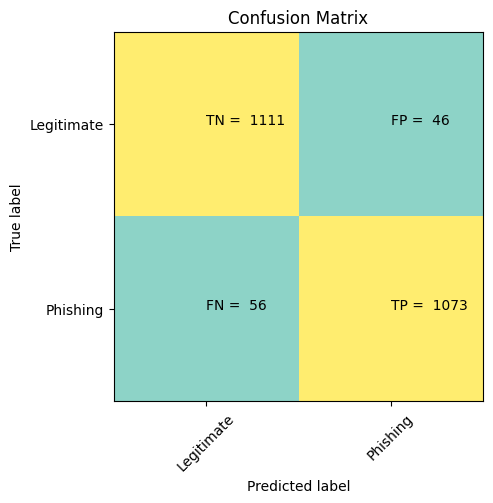

roc_value: 0.9888
threshold: 0.4595
ROC AUC for the test dataset: 0.9888


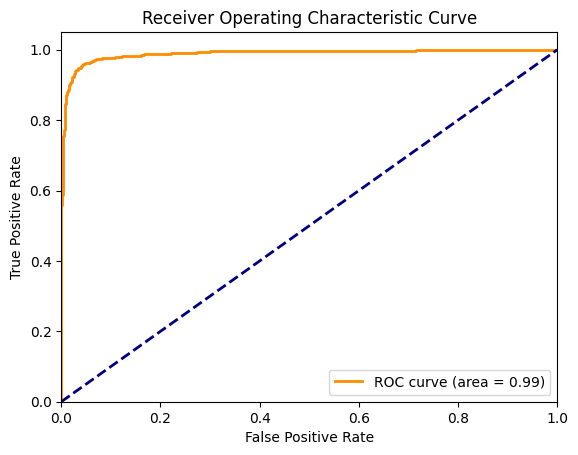

Time Taken by Model: ---- 1.38 seconds ----  
******************************************************************************************************************************************************


In [ ]:
import time

print("**************************************************** LOGISTIC REGRESSION MODEL ************************************************")
model_name="LogisticRegression"
start_time = time.time()
df_results = BuildModel(model_name,df_results)
print("Time Taken by Model: ---- %.2f seconds ----  " % (time.time() - start_time))
print('*'*150)

# K-Nearest Negihbours (KNN) Classifier

*********************************************** K-NEAREST NEIGHBOURS (KNN) CLASSIFIER *****************************************
accuracy:0.9379
 classification report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      1157
           1       0.97      0.90      0.93      1129

    accuracy                           0.94      2286
   macro avg       0.94      0.94      0.94      2286
weighted avg       0.94      0.94      0.94      2286

Confusion Matrix


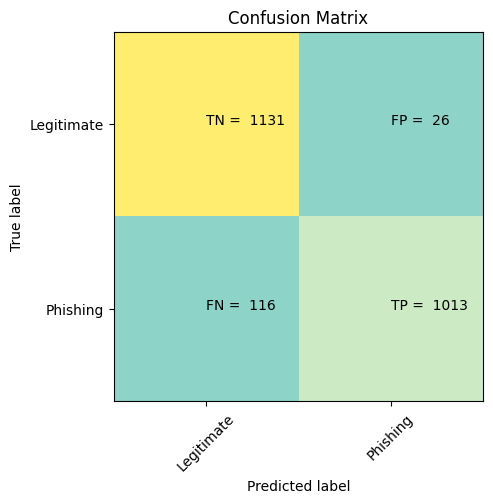

roc_value: 0.9790
threshold: 0.5000
ROC AUC for the test dataset: 0.9790


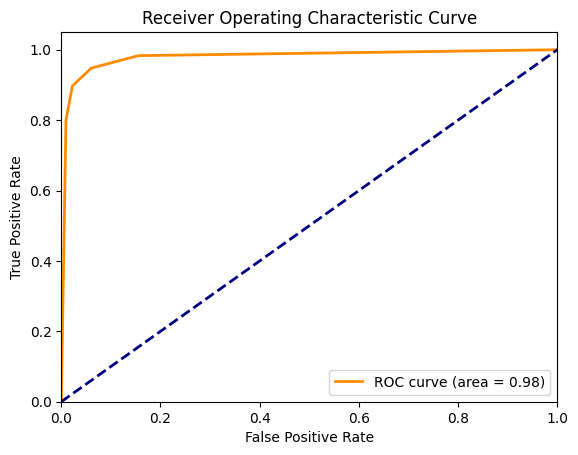

Time Taken by Model: ---- 1.62 seconds ----  
******************************************************************************************************************************************************


In [ ]:

print("*********************************************** K-NEAREST NEIGHBOURS (KNN) CLASSIFIER *****************************************")
model_name='KNeighborsClassifier(KNN)'
start_time = time.time()
df_results = BuildModel(model_name,df_results)
print("Time Taken by Model: ---- %.2f seconds ----  " % (time.time() - start_time))
print('*'*150)

# Decision Tree Classifier

*********************************************** DECISION TREE CLASSIFIER *****************************************************
accuracy:0.9339
 classification report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93      1157
           1       0.93      0.94      0.93      1129

    accuracy                           0.93      2286
   macro avg       0.93      0.93      0.93      2286
weighted avg       0.93      0.93      0.93      2286

Confusion Matrix


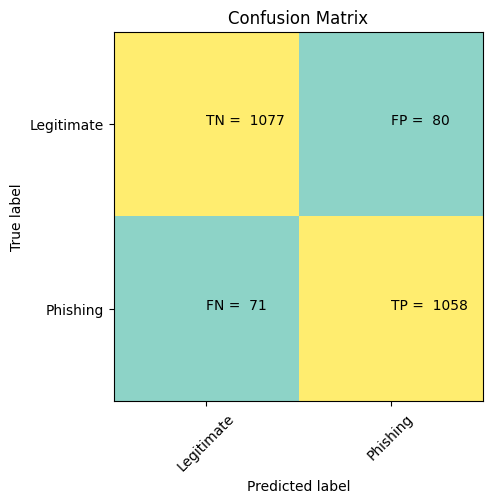

roc_value: 0.9340
threshold: 1.0000
ROC AUC for the test dataset: 0.9340


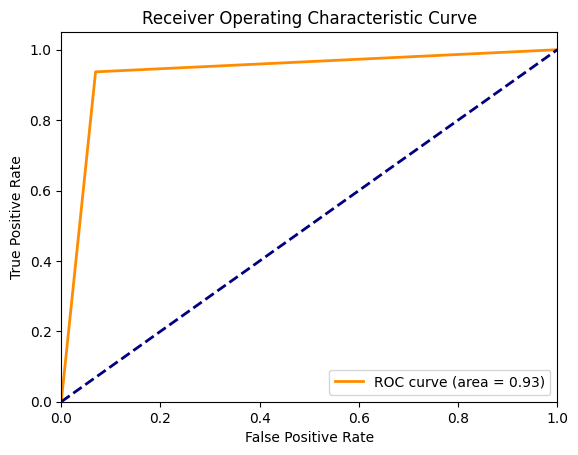

Time Taken by Model: ---- 1.21 seconds ----  
******************************************************************************************************************************************************


In [ ]:
print("*********************************************** DECISION TREE CLASSIFIER *****************************************************")
model_name='DecisionTreeClassifier'
start_time = time.time()
df_results = BuildModel(model_name,df_results)
print("Time Taken by Model: ---- %.2f seconds ----  " % (time.time() - start_time))
print('*'*150)

# Random Forest Classifier

*************************************** RANDOM FOREST CLASSIFIER **********************************************************
accuracy:0.9672
 classification report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      1157
           1       0.97      0.96      0.97      1129

    accuracy                           0.97      2286
   macro avg       0.97      0.97      0.97      2286
weighted avg       0.97      0.97      0.97      2286

Confusion Matrix


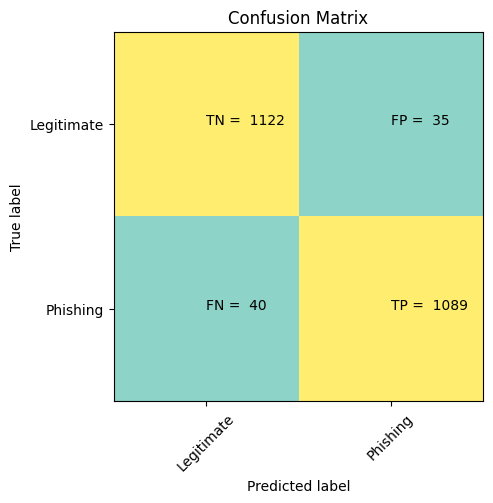

roc_value: 0.9945
threshold: 0.5600
ROC AUC for the test dataset: 0.9945


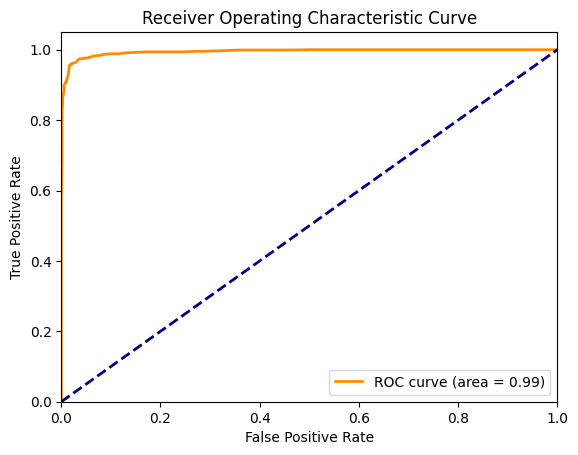

Time Taken by Model: ---- 3.38 seconds ----  
******************************************************************************************************************************************************


In [ ]:
print("*************************************** RANDOM FOREST CLASSIFIER **********************************************************")
model_name='RandomForestClassifier'
start_time = time.time()
df_results = BuildModel(model_name,df_results)
print("Time Taken by Model: ---- %.2f seconds ----  " % (time.time() - start_time))
print('*'*150)

# Support Vector Machines (SVM) Classifier

************************************ SUPPORT VECTOR MACHINES CLASSIFIER ***********************************************
accuracy:0.9633
 classification report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96      1157
           1       0.96      0.96      0.96      1129

    accuracy                           0.96      2286
   macro avg       0.96      0.96      0.96      2286
weighted avg       0.96      0.96      0.96      2286

Confusion Matrix


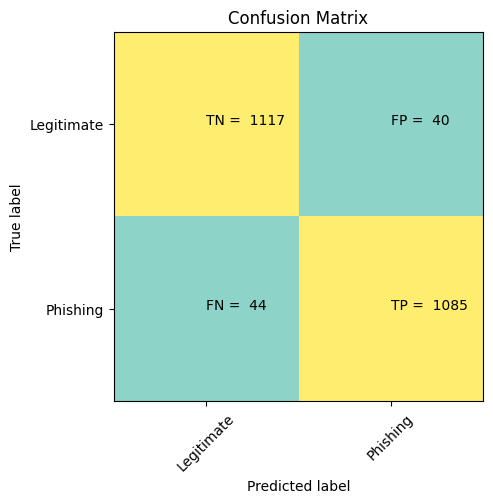

SVM roc_value: 0.9520
threshold: 0.4734
ROC AUC for the test dataset: 0.9520


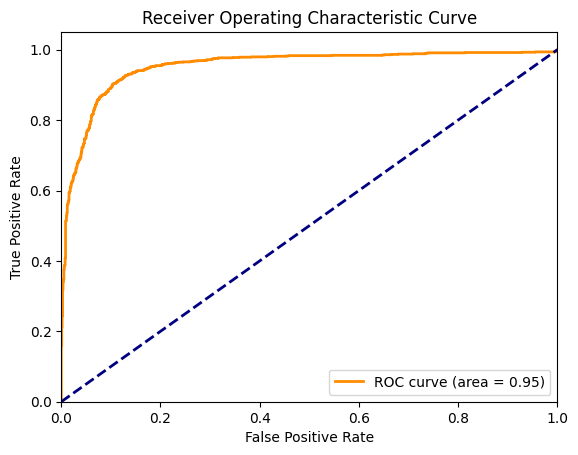

Time Taken by Model: ---- 20.67 seconds ----  
******************************************************************************************************************************************************


In [ ]:
print("************************************ SUPPORT VECTOR MACHINES CLASSIFIER ***********************************************")
model_name='Support Vector Machines(SVM)'
start_time = time.time()
df_results = BuildModel(model_name,df_results)
print("Time Taken by Model: ---- %.2f seconds ----  " % (time.time() - start_time))
print('*'*150)

# Adaboost Classifier

********************************************** ADABOOST CLASSIFIER **********************************************************************
accuracy:0.9348
 classification report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.94      1157
           1       0.94      0.93      0.93      1129

    accuracy                           0.93      2286
   macro avg       0.93      0.93      0.93      2286
weighted avg       0.93      0.93      0.93      2286

Confusion Matrix


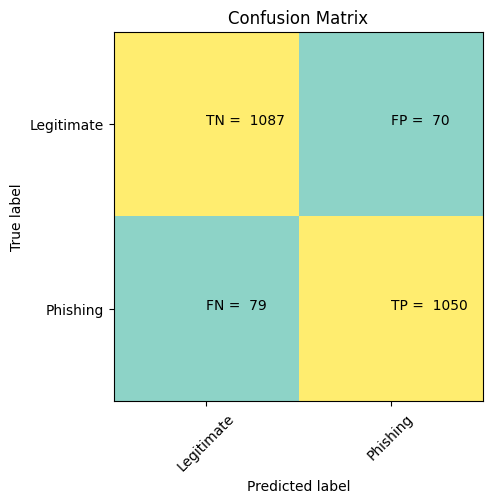

roc_value: 0.9846
threshold: 0.4849
ROC AUC for the test dataset: 0.9846


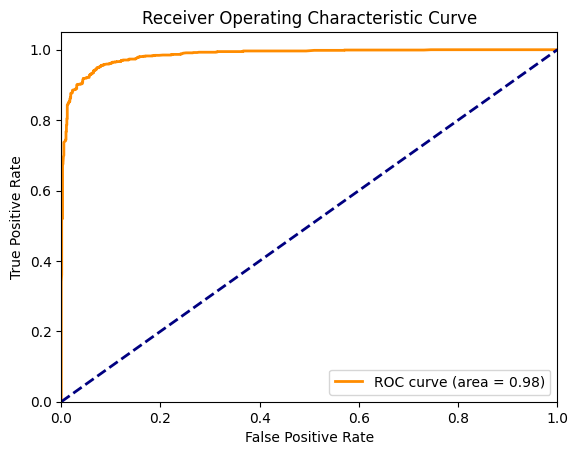

Time Taken by Model: ---- 1.48 seconds ----  
******************************************************************************************************************************************************


In [ ]:
print("********************************************** ADABOOST CLASSIFIER **********************************************************************")
model_name='AdaBoostClassifier'
start_time = time.time()
df_results = BuildModel(model_name,df_results)
print("Time Taken by Model: ---- %.2f seconds ----  " % (time.time() - start_time))
print('*'*150)


# XGBoost Classifier

************************************************** XGBOOST CLASSIFIER ********************************************************************
accuracy:0.9733
 classification report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      1157
           1       0.97      0.97      0.97      1129

    accuracy                           0.97      2286
   macro avg       0.97      0.97      0.97      2286
weighted avg       0.97      0.97      0.97      2286

Confusion Matrix


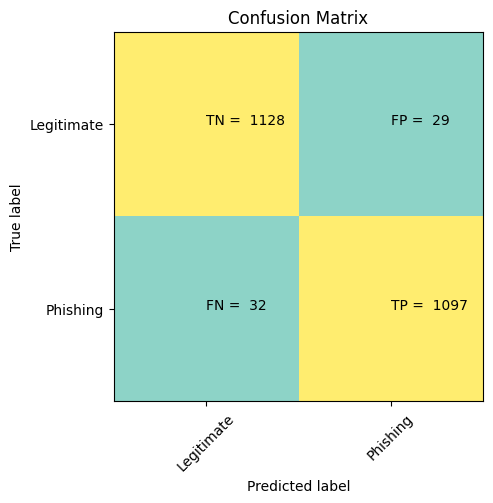

roc_value: 0.9956
threshold: 0.4747
ROC AUC for the test dataset: 0.9956


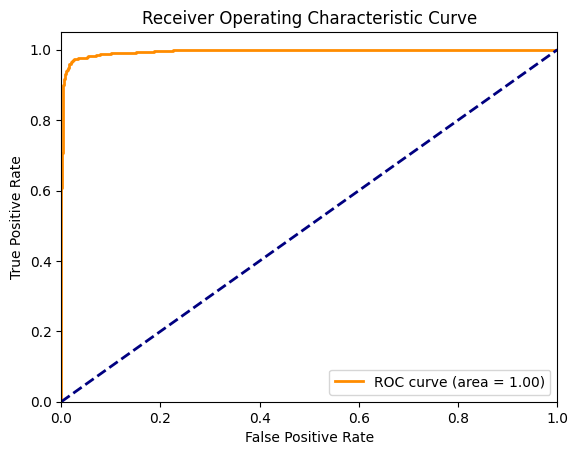

Time Taken by Model: ---- 1.12 seconds ----  
******************************************************************************************************************************************************


In [23]:
print("************************************************** XGBOOST CLASSIFIER ********************************************************************")
model_name='XGBoostClassifier'
start_time = time.time()
df_results = BuildModel(model_name,df_results)
print("Time Taken by Model: ---- %.2f seconds ----  " % (time.time() - start_time))
print('*'*150)

In [ ]:
df_results

Model  Accuracy  roc_value  threshold
0            LogisticRegression  0.955381   0.988776   0.459464
1     KNeighborsClassifier(KNN)  0.937883   0.979004   0.500000
2        DecisionTreeClassifier  0.932633   0.932688   1.000000
3        RandomForestClassifier  0.968066   0.994603   0.520000
4  Support Vector Machines(SVM)  0.963255   0.952007   0.474962
5            AdaBoostClassifier  0.934821   0.984577   0.484861
6             XGBoostClassifier  0.973316   0.995589   0.474672

# Conclusion

Looking at above results, out of all the models built, it seems that XGBoost model has provided the better accuracy and ROC value. So,we will try to tune the hyperparameters of this model to get the best results.

# Hyperparameter Tuning

# HPT - XGBoost Regression

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

grid_search = GridSearchCV(estimator=xgb,
                           param_grid=param_grid,
                           scoring='accuracy',  # or 'roc_auc',
                           cv=3,
                           verbose=3,
                           return_train_score=True)


In [ ]:
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV 1/3] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.8;, score=(train=0.955, test=0.945) total time=   0.3s
[CV 2/3] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.8;, score=(train=0.952, test=0.951) total time=   0.3s
[CV 3/3] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.8;, score=(train=0.952, test=0.945) total time=   0.3s
[CV 1/3] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=1.0;, score=(train=0.954, test=0.944) total time=   0.3s
[CV 2/3] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=1.0;, score=(train=0.952, test=0.948) total time=   0.3s
[CV 3/3] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=1.0;, score=(train=0.953, test=0.947) total time=   0.4s
[CV 1/3] END colsamp

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.05, 0.1], 'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200], 'subsample': [0.8, 1.0]},
             return_train_score=True, scoring='accuracy', verbose=3)

In [ ]:
grid_search.cv_results_


{'mean_fit_time': array([0.29494762, 0.30649257, 0.47980134, 0.53931872, 1.10504119,
        0.49754349, 0.82019218, 0.79927556, 0.7818017 , 1.40730524,
        1.24423273, 2.1769228 , 0.2955939 , 0.27501353, 0.46746929,
        0.44909803, 0.46748575, 0.44541558, 1.37190056, 0.7666525 ,
        0.66741045, 0.72557282, 1.7412529 , 1.52674619, 0.30567193,
        0.30173079, 0.51304897, 1.02345999, 0.59381843, 0.53874755,
        0.89743082, 0.86913443, 1.45047355, 0.93653989, 1.40146422,
        2.11263363, 0.30487776, 0.29620012, 0.50521509, 0.48866932,
        0.59395353, 1.08054924, 0.84716479, 0.80098685, 0.77221584,
        1.41083964, 1.18612568, 1.23904896]),
 'std_fit_time': array([0.00846321, 0.02071165, 0.01999214, 0.08773233, 0.60921197,
        0.01739493, 0.02405471, 0.02481107, 0.02765065, 0.84477799,
        0.01376013, 0.83206173, 0.01984389, 0.01393893, 0.01573082,
        0.0142587 , 0.01779961, 0.01340252, 0.61879796, 0.01197356,
        0.02088046, 0.05037595, 0.963

In [ ]:
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}
Best score: 0.9655511811023622


Model Accuracy: 0.9733
accuracy:0.9733
 classification report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      1157
           1       0.97      0.97      0.97      1129

    accuracy                           0.97      2286
   macro avg       0.97      0.97      0.97      2286
weighted avg       0.97      0.97      0.97      2286

Confusion Matrix


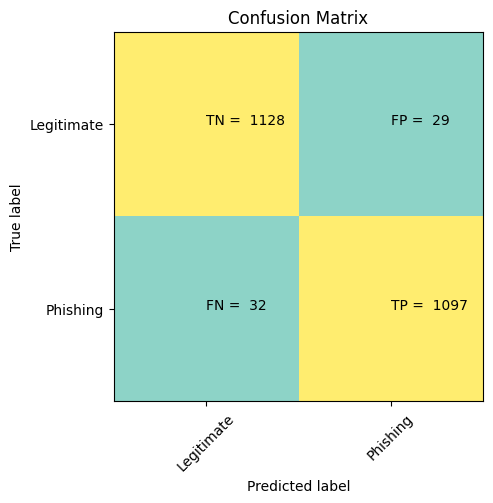

XGboost roc_value: 0.9956
roc_value: 0.9956
threshold: 0.4747
ROC AUC for the test dataset: 0.9956


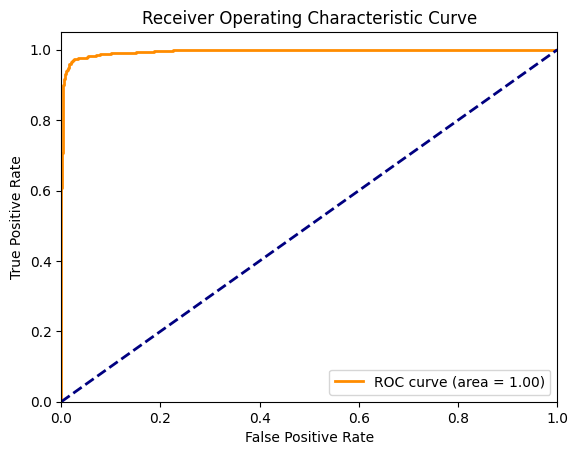

In [24]:
# Creating XGBoost model with selected hyperparameters
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
param_grid = {'learning_rate': 0.1,
          'max_depth': 7,
          'n_estimators':200,
          'subsample':1.0,
          'colsample_bytree':0.8,
          'objective':'binary:logistic'}

# fit model on training data
XGB = XGBClassifier(params = param_grid)
XGB.fit(x_train, y_train)
XGB_test_score = XGB.score(x_test,y_test)
print('Model Accuracy: %0.4f' % XGB_test_score)
y_pred=XGB.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
clas_rep=classification_report(y_test,y_pred)
print(f"accuracy:{accuracy:.4f}\n classification report:\n {clas_rep}")
print("Confusion Matrix")
Plot_confusion_matrix(y_test,y_pred)

# Probabilities of each class
XGB_probs = XGB.predict_proba(x_test)[:,1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: %0.4f" % XGB_roc_value)
y_probs = XGB.predict_proba(x_test)[:, 1]
# Calculate ROC AUC
roc_value = roc_auc_score(y_test, y_probs)
print("roc_value: %0.4f" % roc_value)
fpr,tpr,thresholds = roc_curve(y_test, y_probs)

threshold = thresholds[np.argmax(tpr-fpr)]
print("threshold: %0.4f" % threshold)
roc_auc = auc(fpr, tpr)
print("ROC AUC for the test dataset: %0.4f" % roc_auc)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc=4)
plt.show()


# Important features of the best model


In [ ]:
# Features of XGBoost model

var_imp = []
for i in XGB.feature_importances_:
    var_imp.append(i)
print('Top var index =', var_imp.index(np.sort(XGB.feature_importances_)[-1])+1)
print('2nd Top var index =', var_imp.index(np.sort(XGB.feature_importances_)[-2])+1)
print('3rd Top var index =', var_imp.index(np.sort(XGB.feature_importances_)[-3])+1)

top_var_index = var_imp.index(np.sort(XGB.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(XGB.feature_importances_)[-2])

Top var index = 86
2nd Top var index = 7
3rd Top var index = 87


In [ ]:
XGB.feature_importances_

array([0.00444574, 0.0078879 , 0.01192265, 0.00737059, 0.00986413,
       0.00271638, 0.04001685, 0.00384318, 0.        , 0.00673013,
       0.00427827, 0.        , 0.00753497, 0.00663229, 0.        ,
       0.0174098 , 0.        , 0.        , 0.        , 0.0084864 ,
       0.02773288, 0.00502392, 0.        , 0.        , 0.00319268,
       0.00419512, 0.02407581, 0.        , 0.01128053, 0.00741513,
       0.00189022, 0.        , 0.        , 0.0019645 , 0.00131541,
       0.00130782, 0.        , 0.00131858, 0.        , 0.01321064,
       0.00447145, 0.00225401, 0.00399069, 0.00645037, 0.00637076,
       0.00345599, 0.01128579, 0.00240308, 0.00223028, 0.00288726,
       0.01912729, 0.01068623, 0.        , 0.        , 0.02759692,
       0.00244567, 0.02751871, 0.00286474, 0.00518528, 0.        ,
       0.00413238, 0.        , 0.00320122, 0.        , 0.00273983,
       0.00267533, 0.00186349, 0.00480987, 0.        , 0.00246957,
       0.00365384, 0.        , 0.        , 0.        , 0.00575

In [ ]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(XGB.feature_importances_))],axis=1)
coefficients.columns =['Feature','Importance Coefficient']

In [ ]:
coefficients

Feature  Importance Coefficient
0        length_url                0.004446
1   length_hostname                0.007888
2                ip                0.011923
3           nb_dots                0.007371
4        nb_hyphens                0.009864
..              ...                     ...
82       domain_age                0.005402
83      web_traffic                0.009308
84       dns_record                0.015352
85     google_index                0.496623
86        page_rank                0.035905

[87 rows x 2 columns]

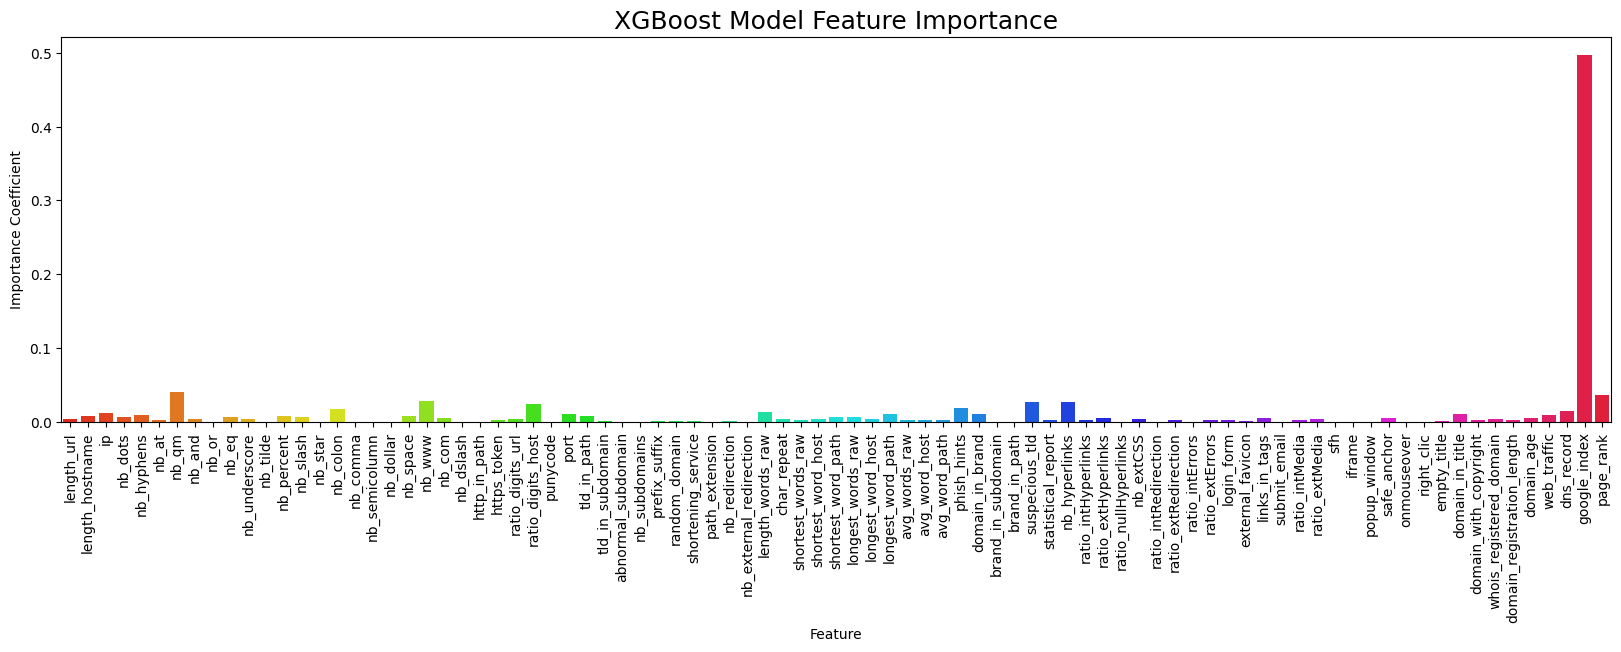

In [ ]:
# Plotting the coefficient values
plt.figure(figsize=(20,5))
sns.barplot(x='Feature',y='Importance Coefficient', data=coefficients,palette='hsv')
plt.title("XGBoost Model Feature Importance", fontsize=18)
plt.xticks(rotation=90)
plt.show()


# Making a Predictive System

In [25]:
input_data = (32,  24,  0,  3,  1,  0,  0,	0,	0,	0,	0,	0,	0,	3,	0,	1,	0,	0,	0,	0,	0,	1,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	3,	1,	0,	0,	0,	1,	0,	4,	3,	3,	3,	0,	7,	7,	0,	4.5,	4.5,	0,	0,	0,	0,	0,	0,	0,	10,	0.3,	0.7,	0,	0,	0,	0.571428571,	0,	0,	0,	0,	100,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1,	1,	0,	-1,	0,	0,	1,	0)


# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = XGB.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('Legitimate website')
else:
  print('Phishing website')

[1]
Phishing website


Saving the trained model

In [26]:
filename='Phishing XGB classifier.pkl'
pickle.dump(XGB, open(filename,'wb'))

In [27]:
# loading the saved model
XGBmodel = pickle.load(open('Phishing XGB classifier.pkl','rb'))

In [28]:
# Save it using XGBoost's native method
XGBmodel.save_model('Phishing_XGB_model.json')

In [ ]:
input_data = (32,  24,  0,  3,  1,  0,  0,	0,	0,	0,	0,	0,	0,	3,	0,	1,	0,	0,	0,	0,	0,	1,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	3,	1,	0,	0,	0,	1,	0,	4,	3,	3,	3,	0,	7,	7,	0,	4.5,	4.5,	0,	0,	0,	0,	0,	0,	0,	10,	0.3,	0.7,	0,	0,	0,	0.571428571,	0,	0,	0,	0,	100,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1,	1,	0,	-1,	0,	0,	1,	0)


# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('Legitimate website')
else:
  print('Phishing website')

[1]
Phishing website


**Week 7**

#SHAP or LIME Analysis:

XG Boost models performs best when compared with the other models.SHAP (SHapley Additive exPlanations) is preferred for XGBoost because it offers the most accurate, efficient, and theoretically grounded method for interpreting predictions made by tree-based models.

SHAP includes a specialized algorithm called TreeSHAP, which is specifically designed for decision tree models like XGBoost, LightGBM, and CatBoost. It computes exact Shapley values in polynomial time for tree models, whereas for other models it relies on slower approximation methods.

In [ ]:
explainer = shap.Explainer(XGB)
shap_values = explainer(x_test)

# Summary Plot (Global Feature Importance)

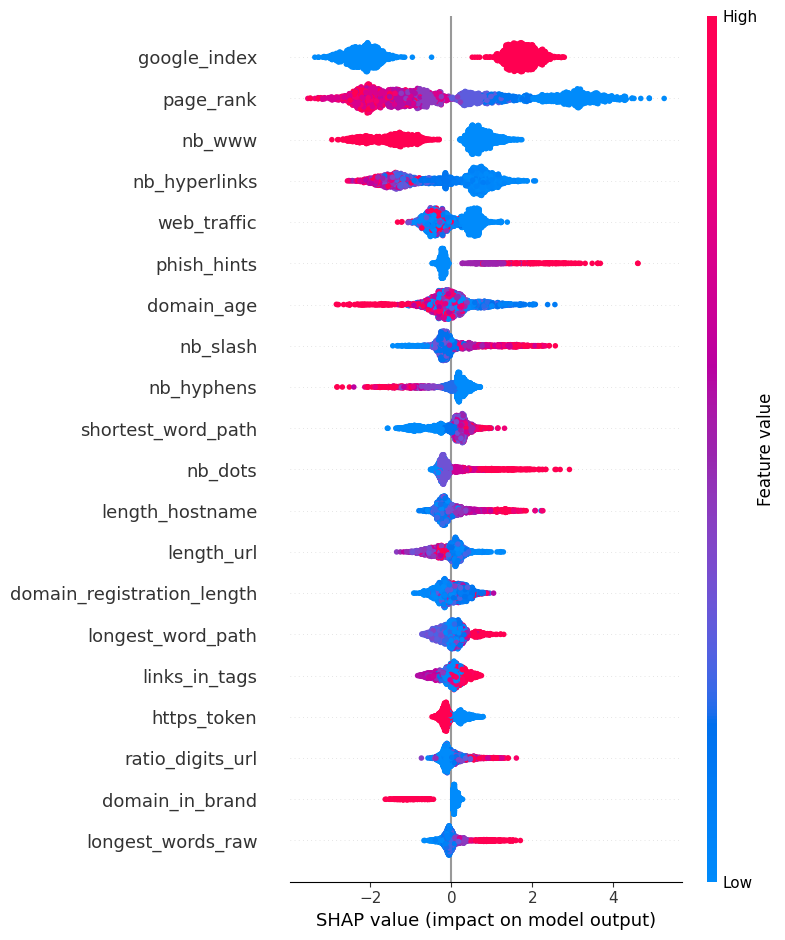

In [ ]:
shap.summary_plot(shap_values, x_test)

# Force Plot (Local Explanation of One Sample)

In [ ]:
shap.initjs()
shap.plots.force(shap_values[0])

In [ ]:
shap.initjs()
shap.plots.force(shap_values[1])

# Dependence Plot (Impact of a Feature)

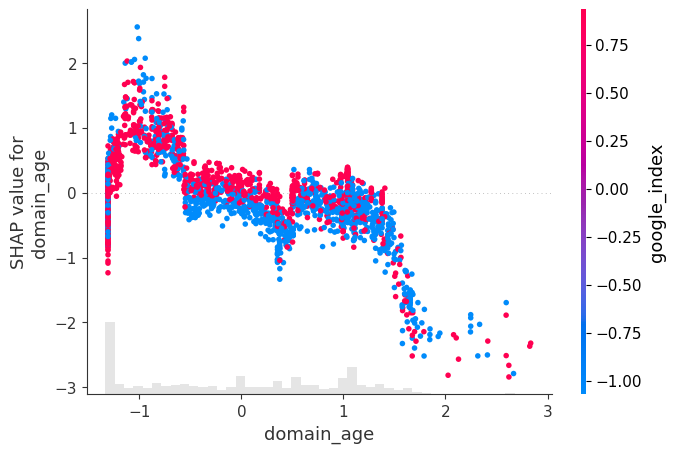

In [ ]:
shap.plots.scatter(shap_values[:, "domain_age"], color=shap_values)

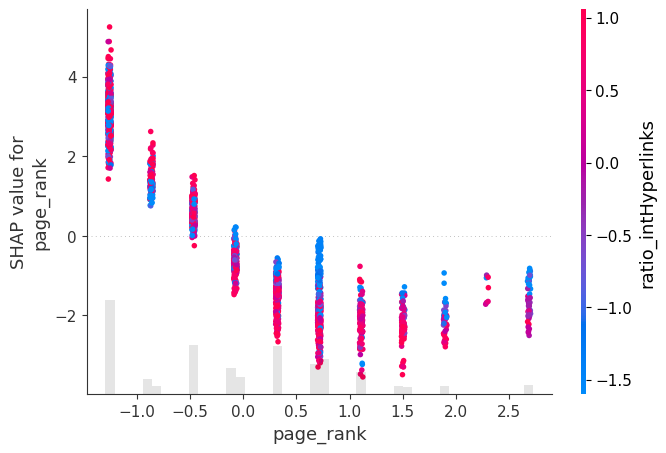

In [ ]:
shap.plots.scatter(shap_values[:, "page_rank"], color=shap_values)

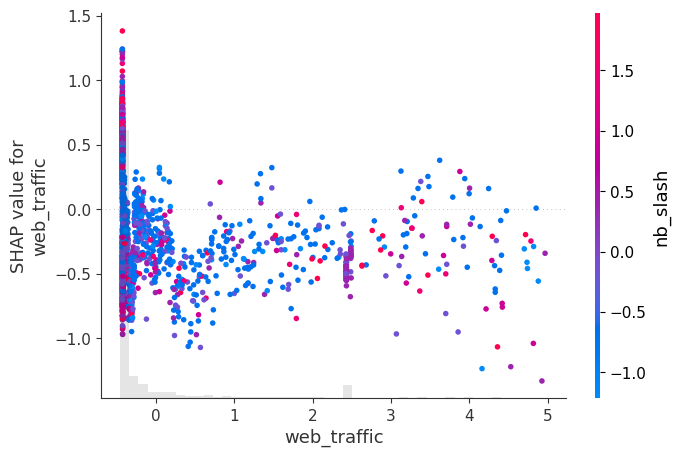

In [ ]:
shap.plots.scatter(shap_values[:, "web_traffic"], color=shap_values)

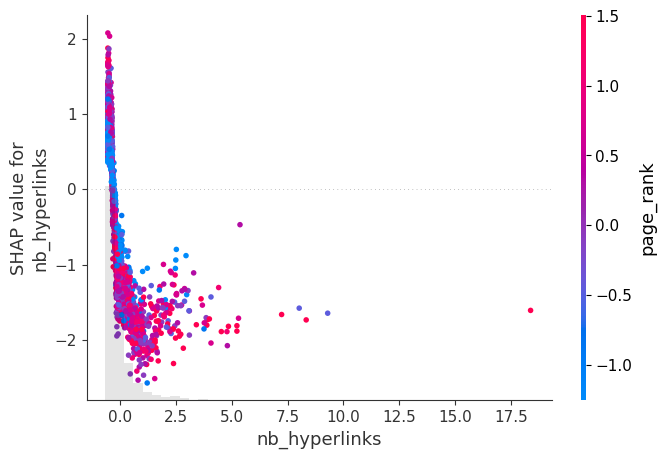

In [ ]:
shap.plots.scatter(shap_values[:, "nb_hyperlinks"], color=shap_values)

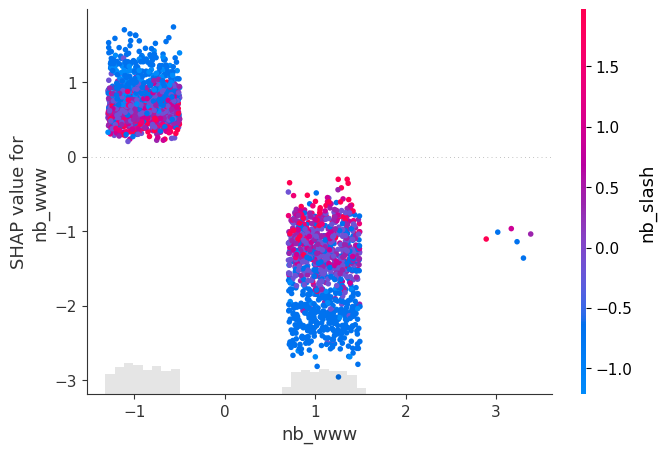

In [ ]:
shap.plots.scatter(shap_values[:, "nb_www"], color=shap_values)

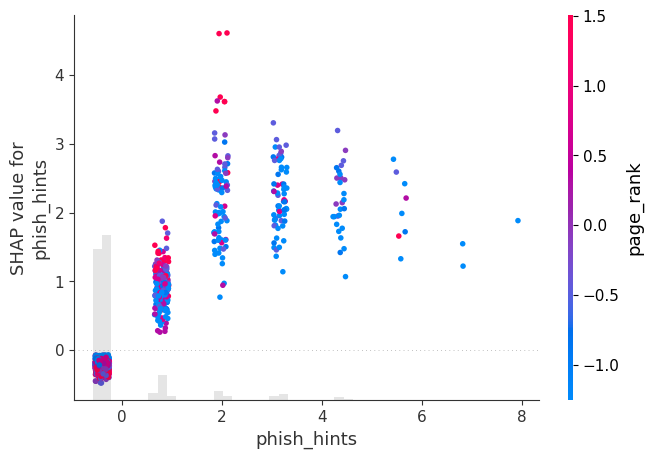

In [ ]:
shap.plots.scatter(shap_values[:, "phish_hints"], color=shap_values)

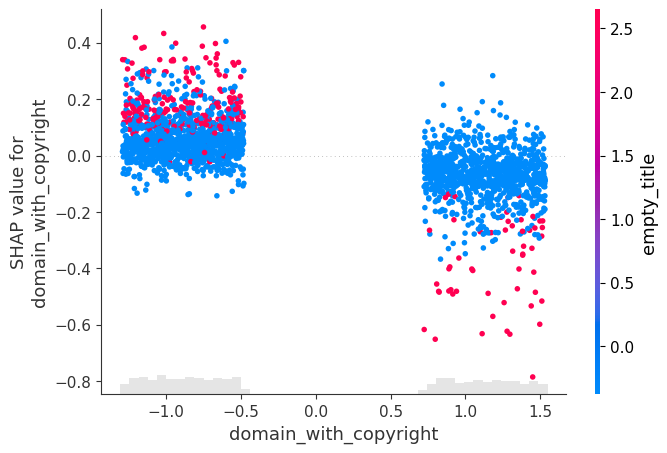

In [ ]:
shap.plots.scatter(shap_values[:, "domain_with_copyright"], color=shap_values)

Top features by average SHAP value:

In [ ]:
import numpy as np

mean_abs_shap = np.abs(shap_values.values).mean(axis=0)
feature_importance = pd.DataFrame({
    'feature': x_test.columns,
    'mean_abs_shap': mean_abs_shap
}).sort_values(by='mean_abs_shap', ascending=False)

print(feature_importance.head(10))


               feature  mean_abs_shap
85        google_index       1.956229
86           page_rank       1.774503
20              nb_www       1.086634
56       nb_hyperlinks       0.966538
83         web_traffic       0.450102
50         phish_hints       0.444112
82          domain_age       0.442803
13            nb_slash       0.394128
4           nb_hyphens       0.377092
43  shortest_word_path       0.360260


Save Plots to Files

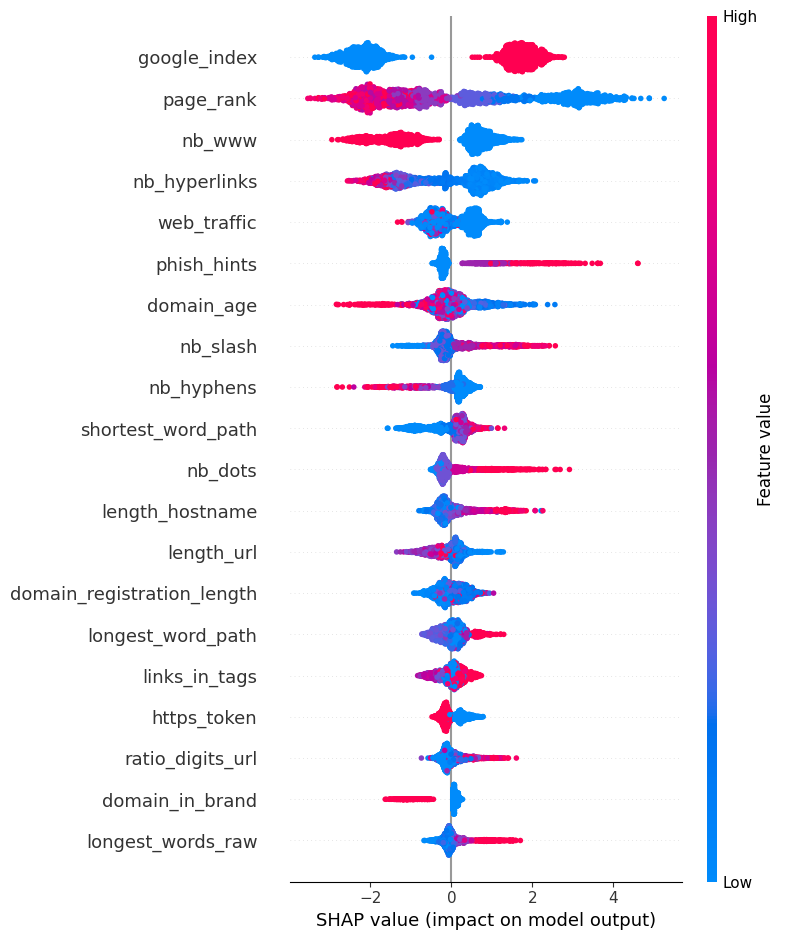

In [ ]:
# Summary plot
plt.figure()
shap.summary_plot(shap_values, x_test, show=False)
plt.savefig("shap_summary_plot.png", bbox_inches='tight')

In [ ]:
explainer = shap.TreeExplainer(XGB)

In [ ]:
with open('explainer.pkl', 'wb') as f:
    pickle.dump(explainer, f)

**Week 8**